Example complicated lactam analysis using multiple cores.  Note that the cores need to be used in order of least to most specific here as the first core matched will be used to form the RGroups.

In [13]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition, RGroupDecompositionParameters, RGroupMatching
import pandas as pd
from rdkit.Chem import PandasTools
from collections import OrderedDict
from IPython.display import HTML

In [35]:
cores = OrderedDict()
cores_stereo = OrderedDict()

#cores['cephem'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)=C([*:3])CS2')
#cores_stereo['cephem'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)=C([*:3])CS2')

#cores['carbacephem'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)=C([*:3])CC2')
#cores_stereo['carbacephem'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)=C([*:3])CC2')

#cores['oxacephem'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)=C([*:3])CO2')
#cores_stereo['oxacephem'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)=C([*:3])CO2')

#cores['carbapenem'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)=C([*:3])C2')
#cores_stereo['carbapenem'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)=C([*:3])C2')

cores['carbapenam'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)C([*:3])([*:4])C2')
cores_stereo['carbapenam'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)C([*:3])([*:4])C2')

#cores['penem'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)=C([*:3])S2')
#cores_stereo['penem'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)=C([*:3])S2')

cores['penam'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)C([*:3])([*:4])S2')
cores_stereo['penam'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)C([*:3])([*:4])S2')

cores['oxapenam'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)C([*:3])([*:4])O2')
cores_stereo['oxapenam'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)C([*:3])([*:4])O2')

#cores['monobactam'] = Chem.MolFromSmiles('O=C1C([*:1])C([*:5])N1')
#cores_stereo['monobactam'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])C([*:6])([*:5])N1')

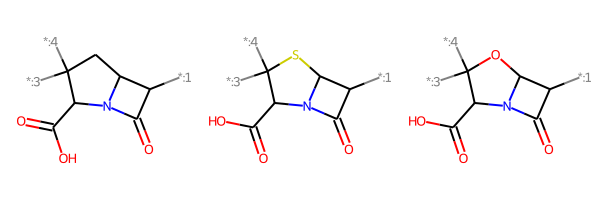

In [36]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(cores.values())

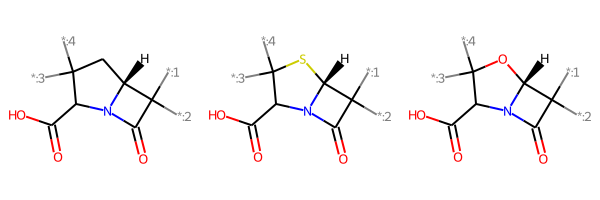

In [37]:
Draw.MolsToGridImage(cores_stereo.values())

To use RGroupDecomposition:
  
  1. construct the class on the core rg = RGroupDecomposition(cores)
  2. Call rg.Add( mol ) on the molecules.  If this returns -1, the molecule is not
     compatible with the core
  3. After all molecules are added, call rg.Process() to complete the rgroup
     decomposition.
     
This is not the fastest thing on the planet, you will note that it gets slower as more items get added, this is due to the internal processing every five molecules...


In [51]:
options = RGroupDecompositionParameters()
options.matchingStrategy = RGroupMatching.NoSymmetrization
rg_easy = RGroupDecomposition(cores.values())
rg_stereo = RGroupDecomposition(cores_stereo.values(), options)
print("Added cores")
mols = []
count = 0
maxEasy = -1
maxStereo = -1
for line in open("compounds.txt"):
    sm = line.split()[-1]
    m = Chem.MolFromSmiles(sm)
    if m:
        count += 1
        idx1 = maxEasy = max(maxEasy,rg_easy.Add(m))
        idx2 = maxStereo = max(maxStereo,rg_stereo.Add(m))
        if count % 100 == 0:
            print("Added", count, maxEasy, maxStereo)
        if count % 1000 ==0:
            break
print ("Added %s to RGroup Easy Decomposition out of %s"%(idx1, count))
print ("Added %s to RGroup Stereo Decomposition out of %s"%(idx2, count))

Added cores
Added 100 13 6


RDKit ERROR: [17:26:41] SMILES Parse Error: syntax error while parsing: CANONICAL_SMILES
RDKit ERROR: [17:26:41] SMILES Parse Error: Failed parsing SMILES 'CANONICAL_SMILES' for input: 'CANONICAL_SMILES'


Added 200 30 20
Added 300 32 22
Added 400 50 40
Added 500 59 47
Added 600 69 55
Added 700 103 86
Added 800 126 109
Added 900 126 109
Added 1000 126 109
Added 126 to RGroup Easy Decomposition out of 1000
Added 109 to RGroup Stereo Decomposition out of 1000


In [52]:
rg_easy.Process()
rg_stereo.Process()

RDKit WARNING: [17:26:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:26:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:26:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:26:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:26:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:26:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:26:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:26:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:26:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:26:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:26:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:26:43] WARNIN

True

Rendering this many molecules is pretty taxing for the current system, this takes a while.

It is useful to disable logging here.  When making RGroup renderings there 
are a lot of sanitization warnings.

In [53]:
from rdkit import rdBase
rdBase.DisableLog("rdApp.*")

The RGroupDecomposition code is quite compatible with the python pandas integration.
Calling rg.GetRGroupsAsColumns() can be sent directly into a pandas table.

**n.b.** You need to call PandasTools.ChangeMoleculeRendering(frame) to allow the molecules
to be rendered properly.

In [54]:
easy_frame = pd.DataFrame(rg_easy.GetRGroupsAsColumns())
PandasTools.ChangeMoleculeRendering(easy_frame)

RDKit WARNING: [17:26:43] WARNING: bond found with stereo spec but no stereo atoms



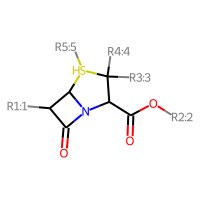
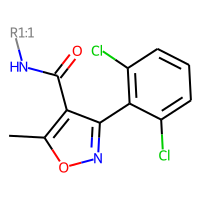
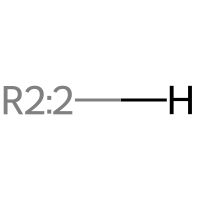
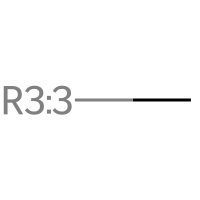
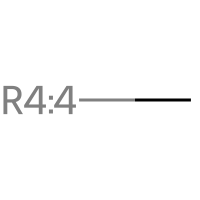
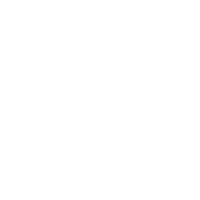
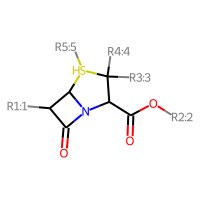
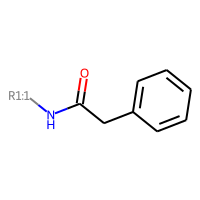
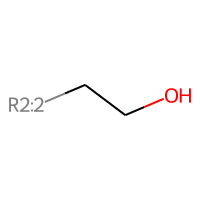
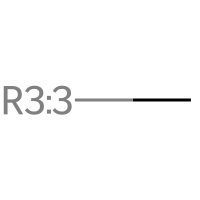
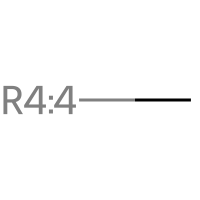
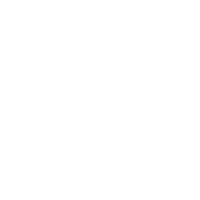
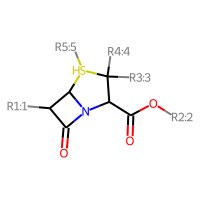
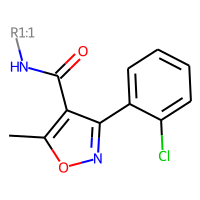
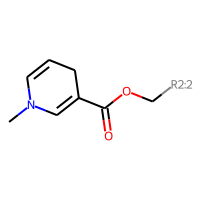
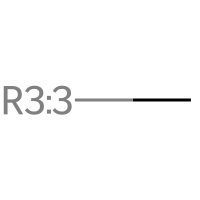
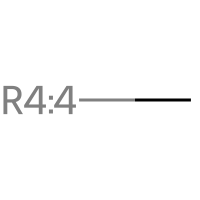
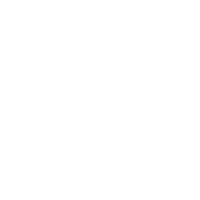
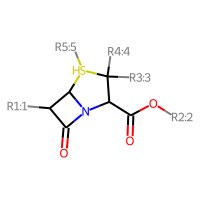
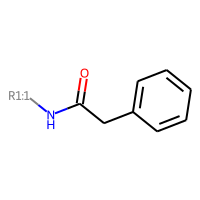
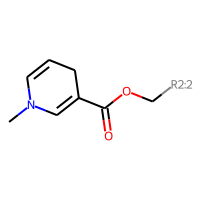
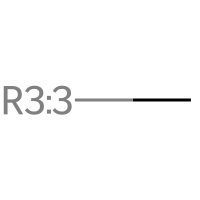
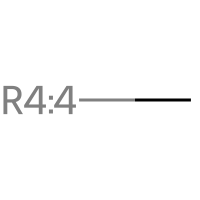
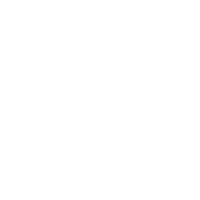
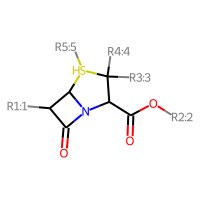
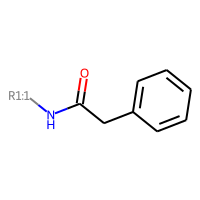
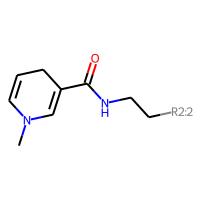
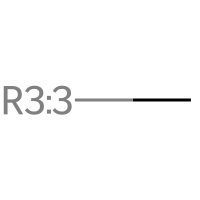
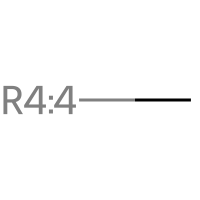
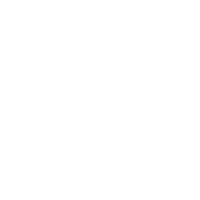
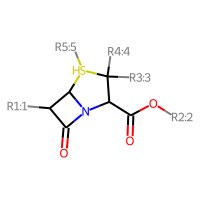
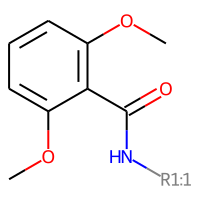
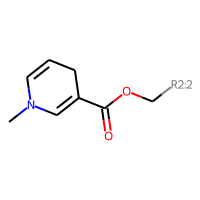
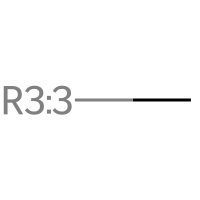
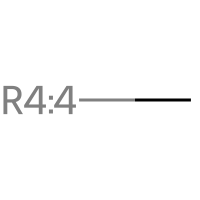
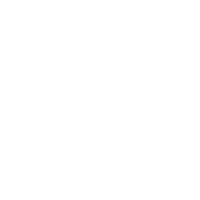
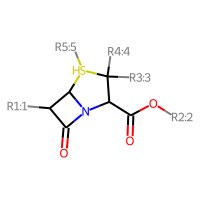
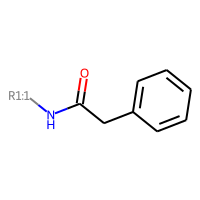
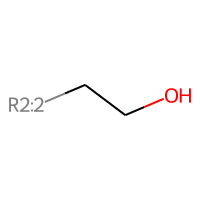
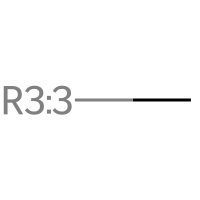
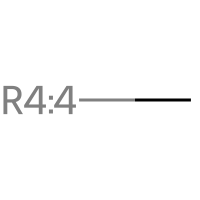
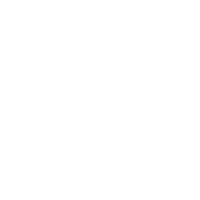
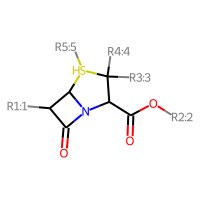
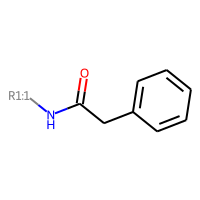
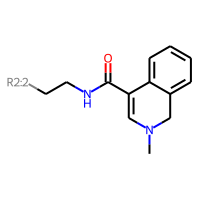
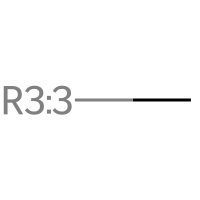
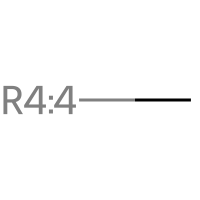
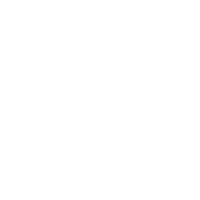
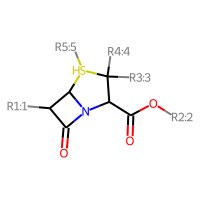
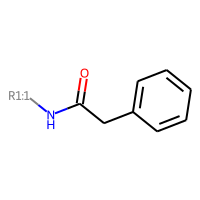
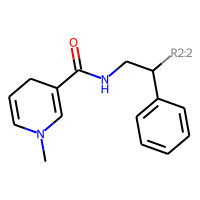
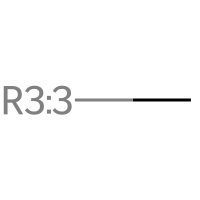
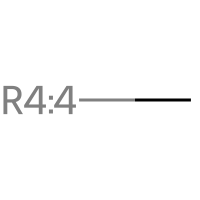
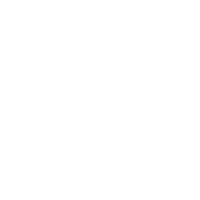
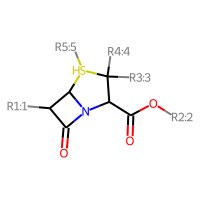
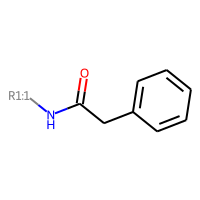
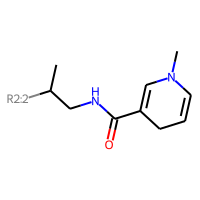
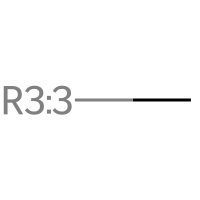
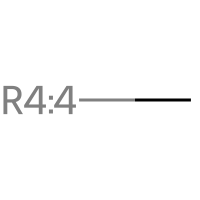
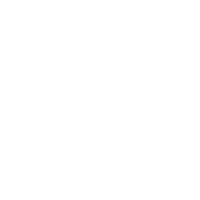
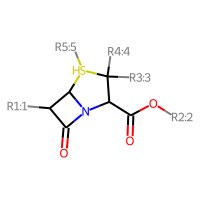
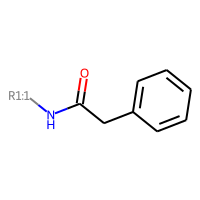
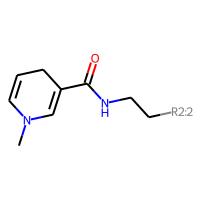
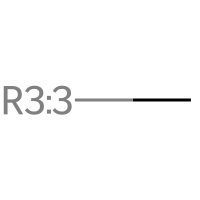
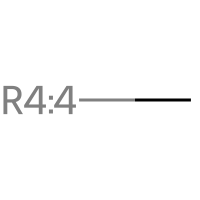
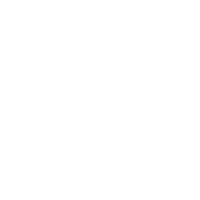
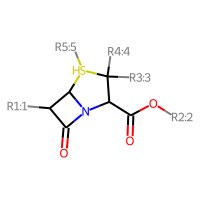
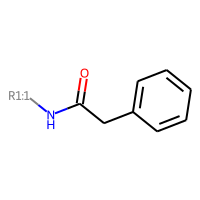
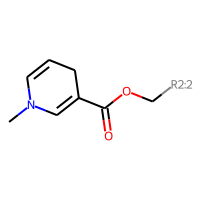
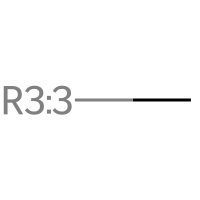
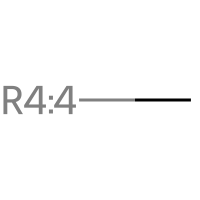
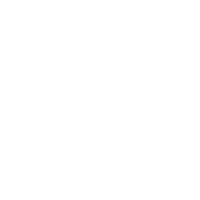
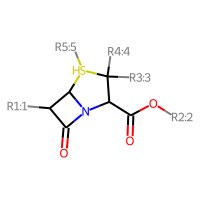
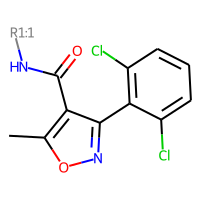
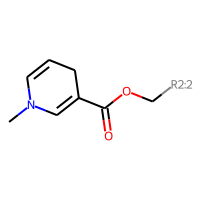
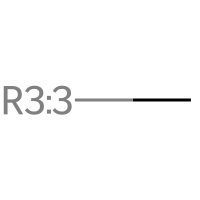
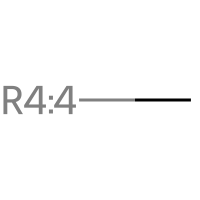
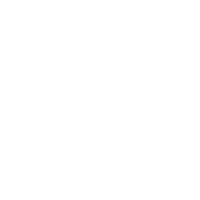
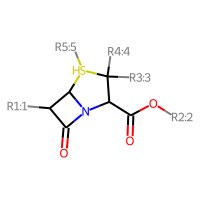
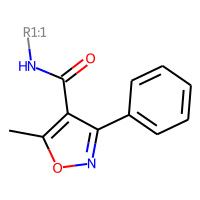
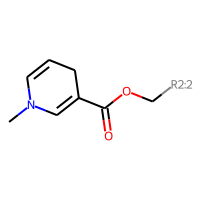
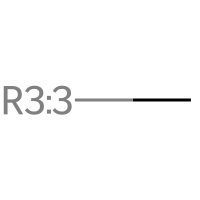
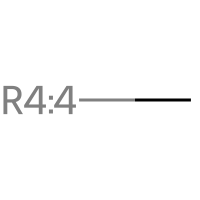
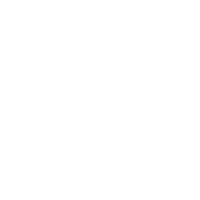
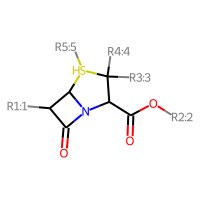
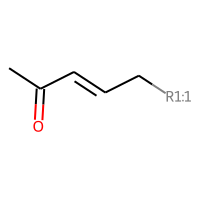
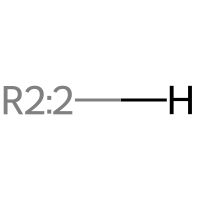
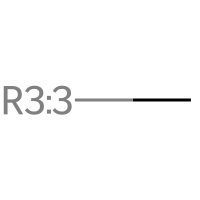
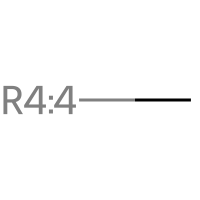
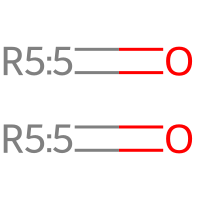
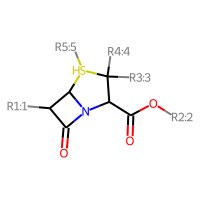
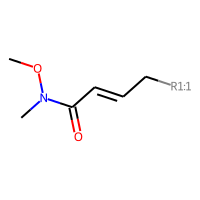
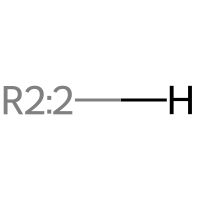
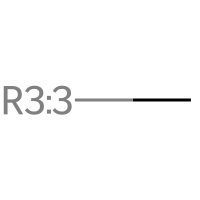
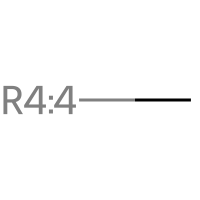
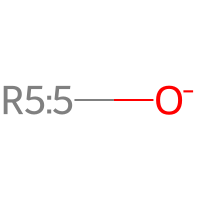
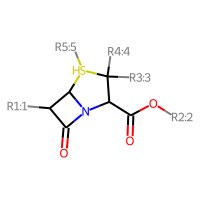
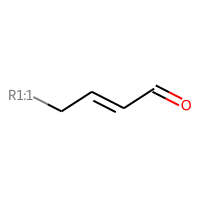
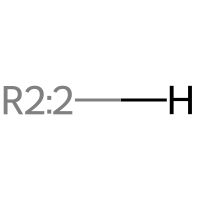
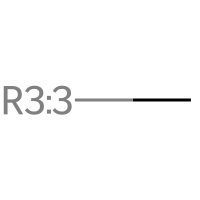
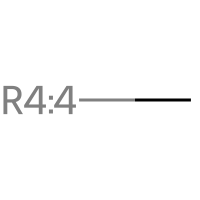
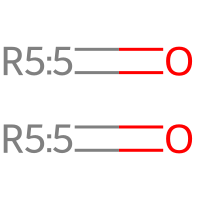
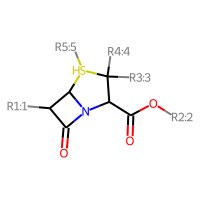
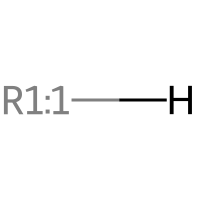
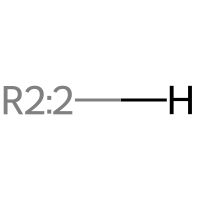
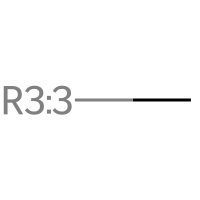
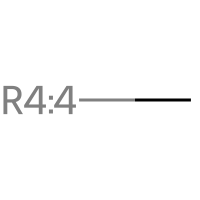
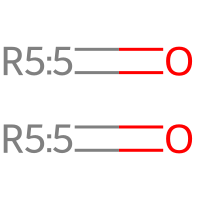
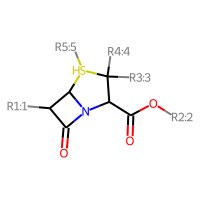
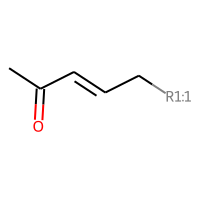
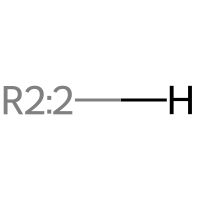
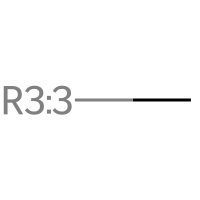
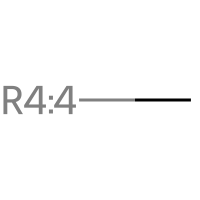
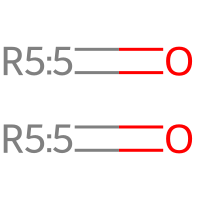
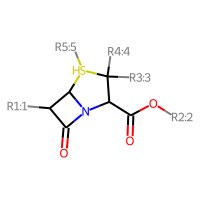
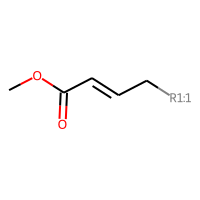
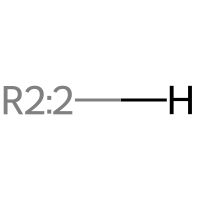
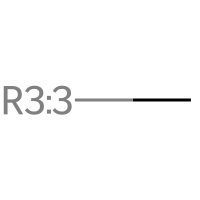
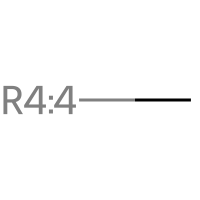
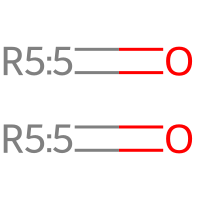
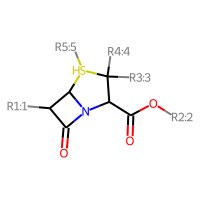
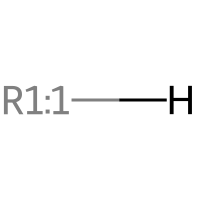
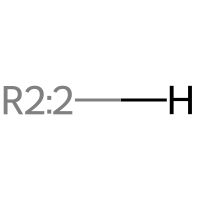
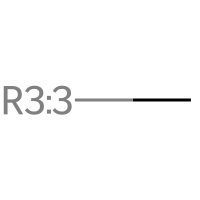
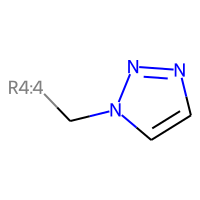
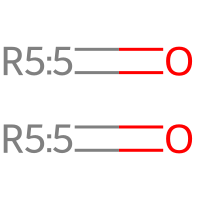
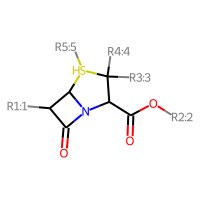
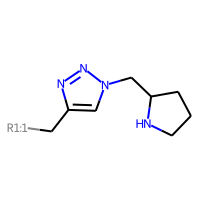
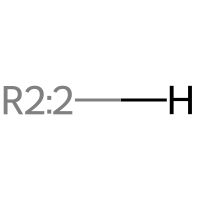
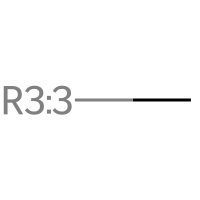
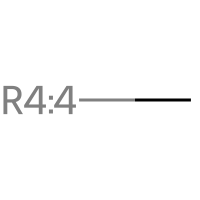
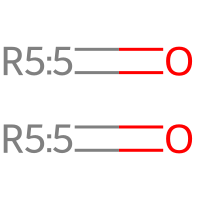
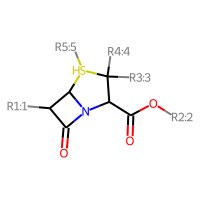
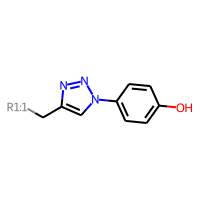
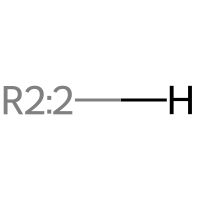
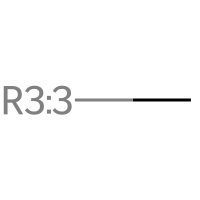
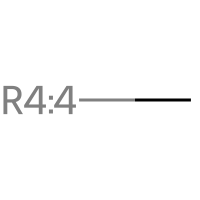
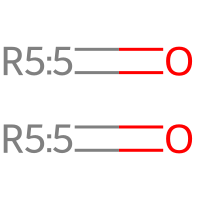
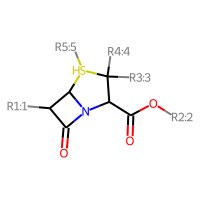
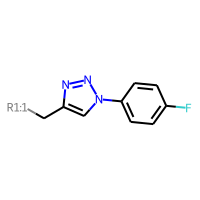
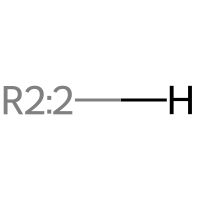
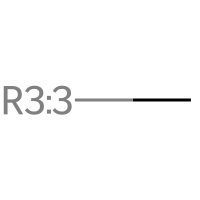
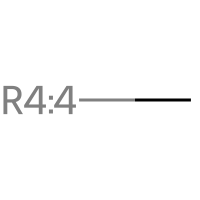
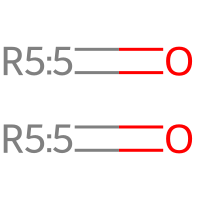
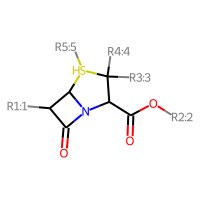
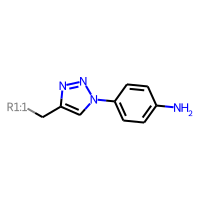
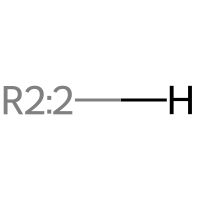
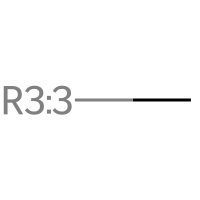
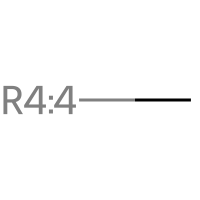
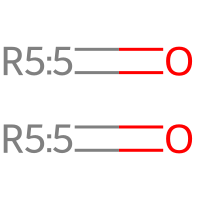
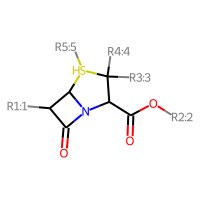
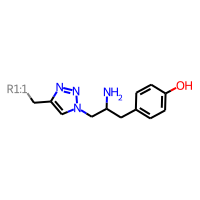
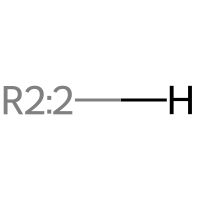
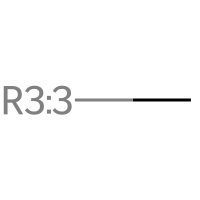
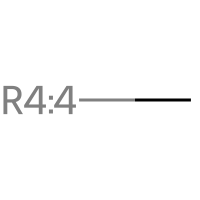
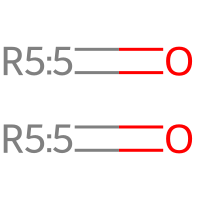
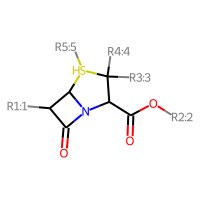
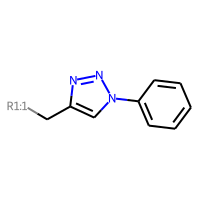
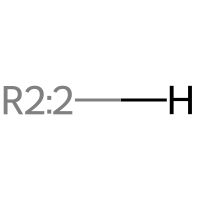
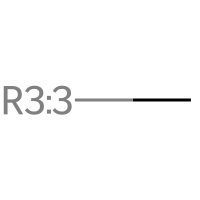
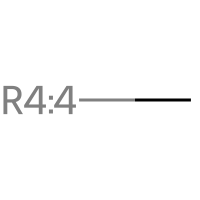
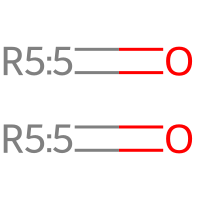
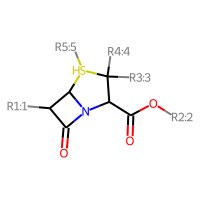
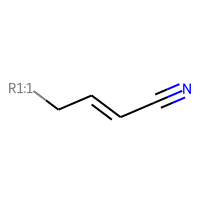
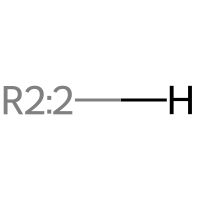
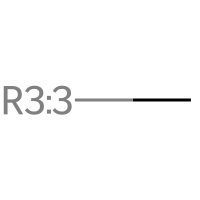
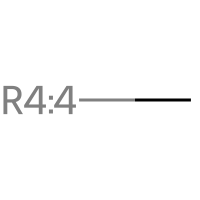
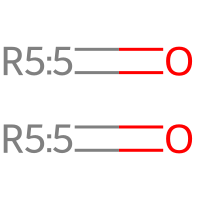
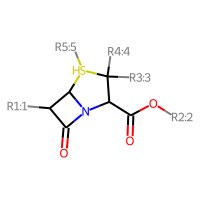
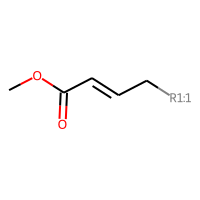
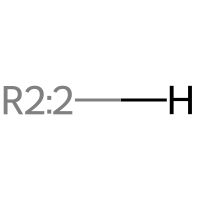
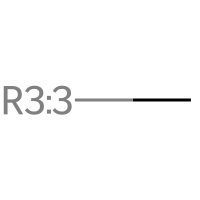
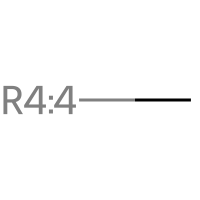
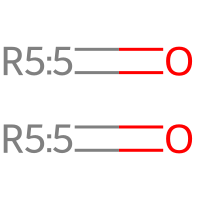
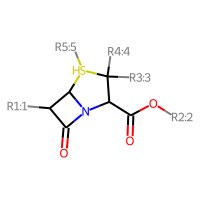
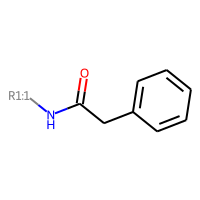
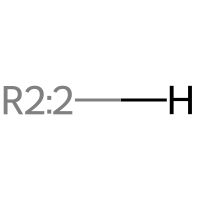
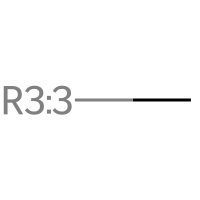
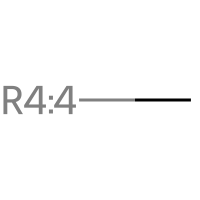
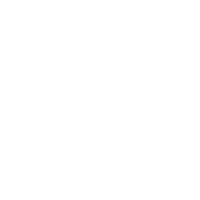
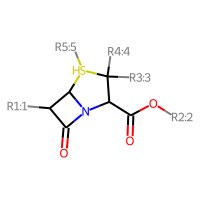
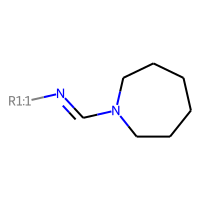
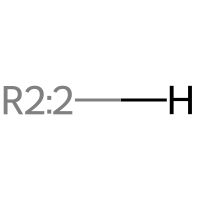
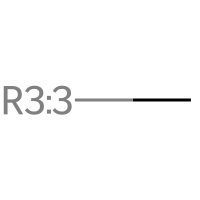
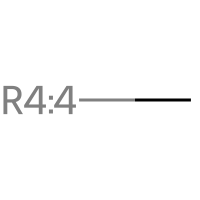
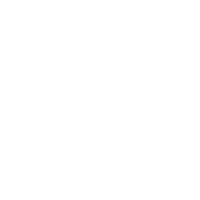
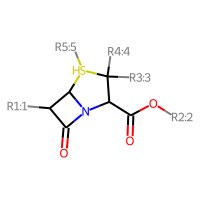
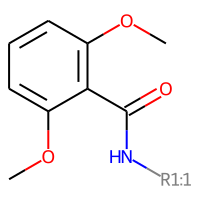
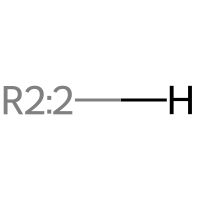
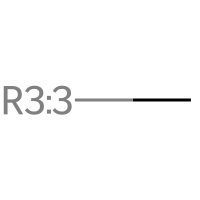
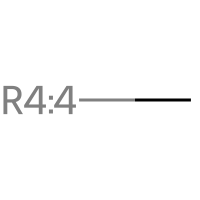
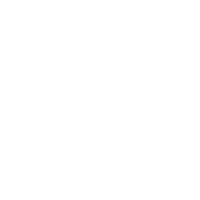
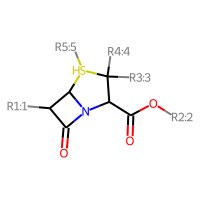
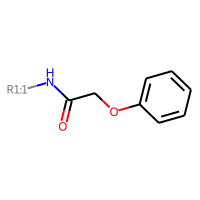
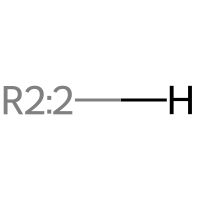
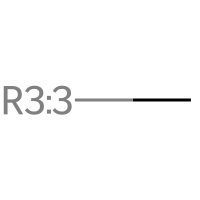
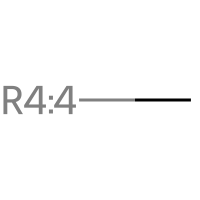
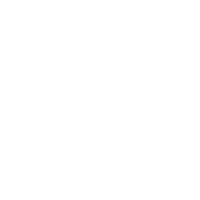
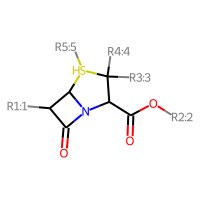
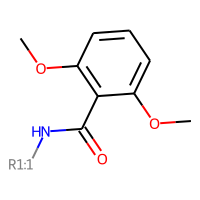
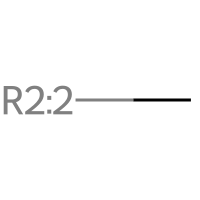
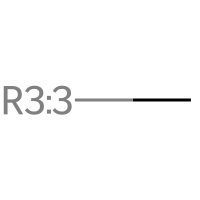
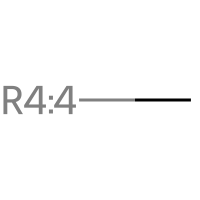
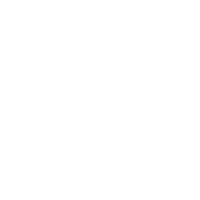
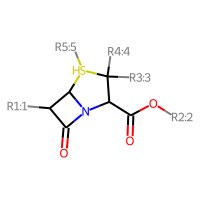
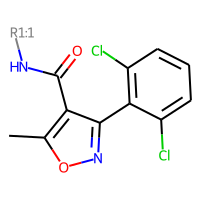
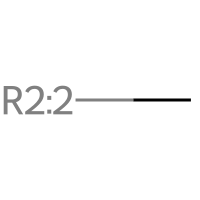
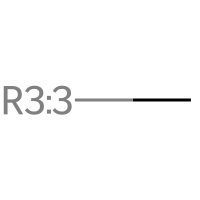
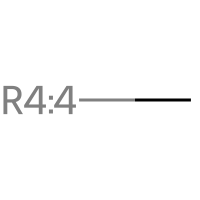
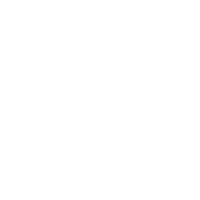
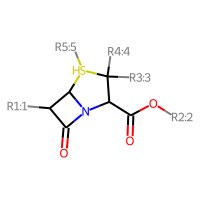
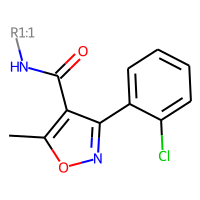
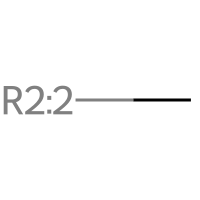
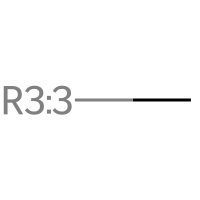
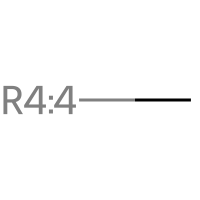
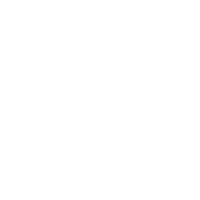
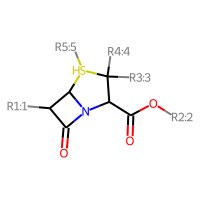
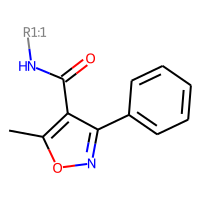
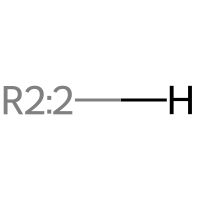
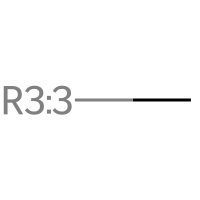
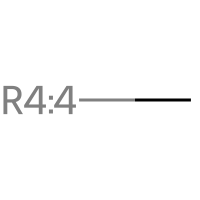
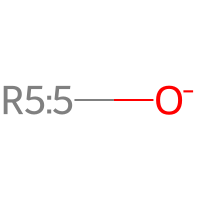
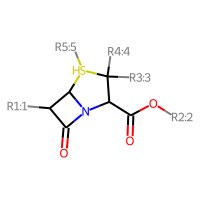
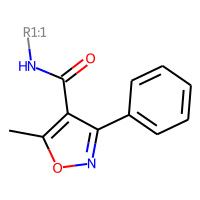
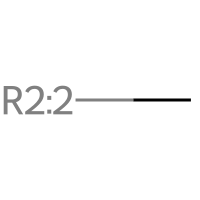
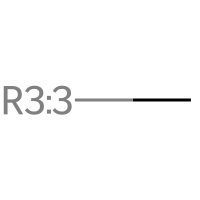
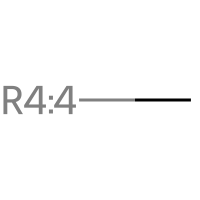
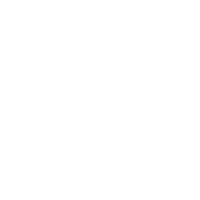
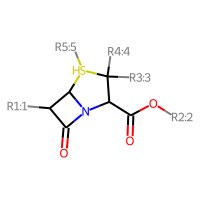
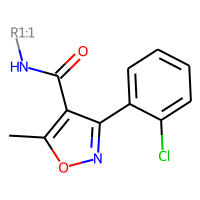
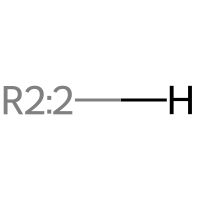
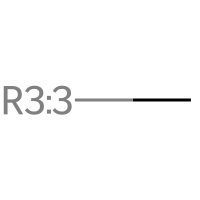
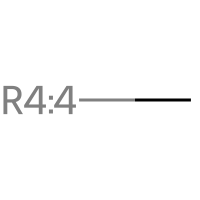
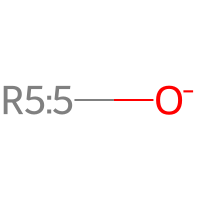
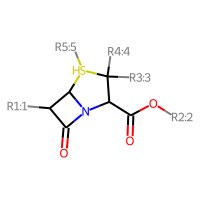
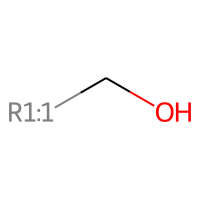
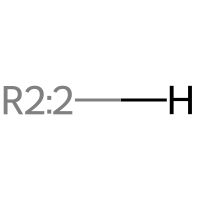
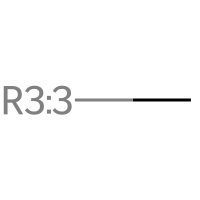
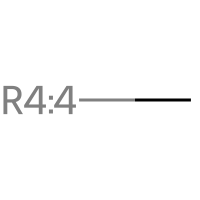
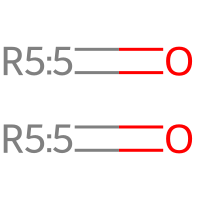
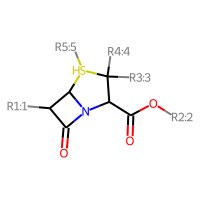
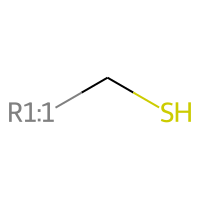
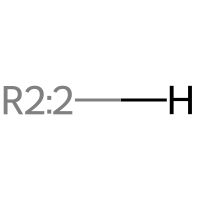
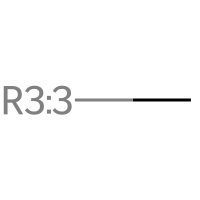
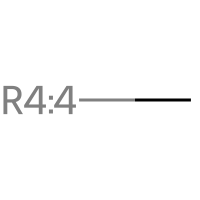
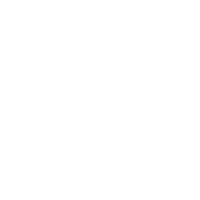
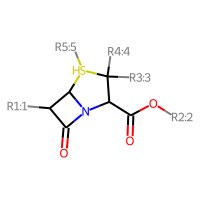
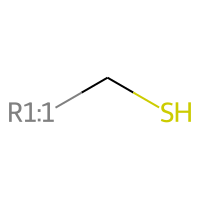
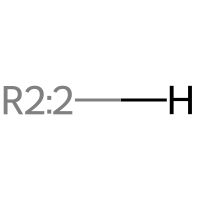
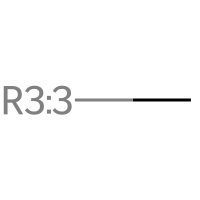
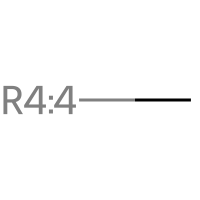
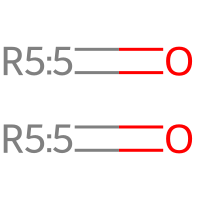
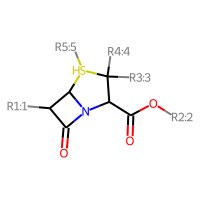
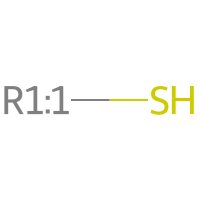
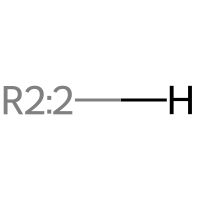
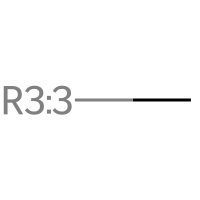
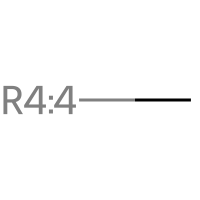
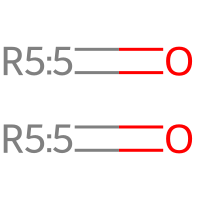
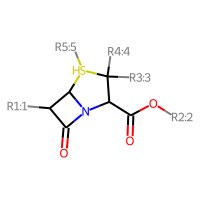
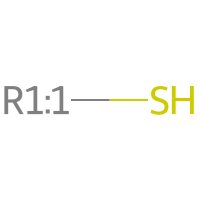
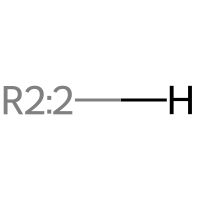
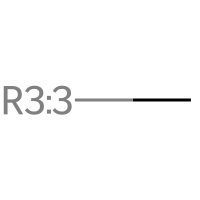
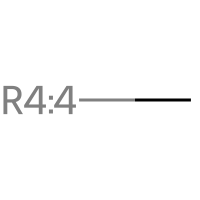
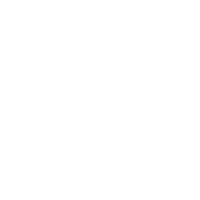
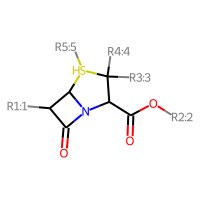
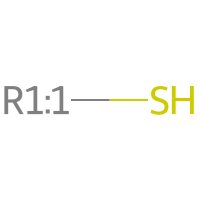
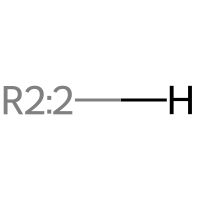
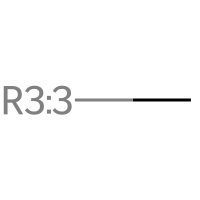
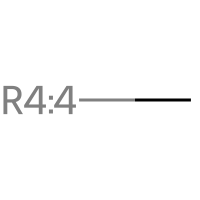
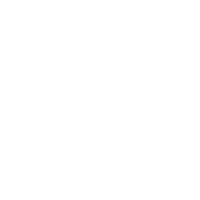
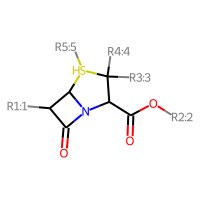
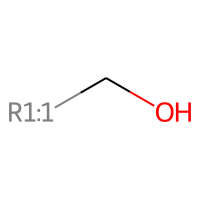
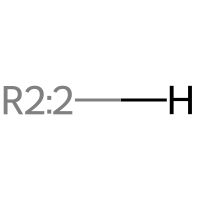
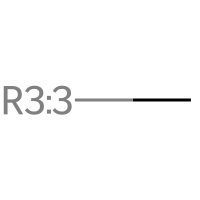
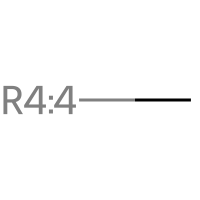
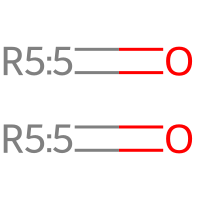
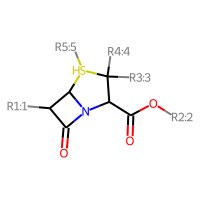
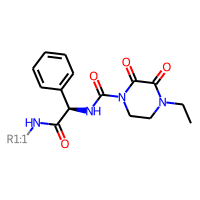
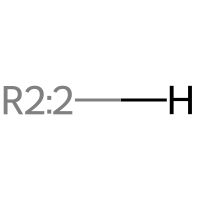
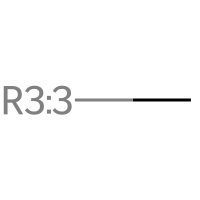
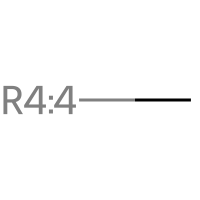
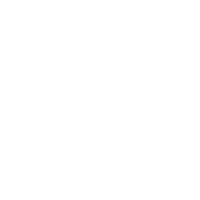
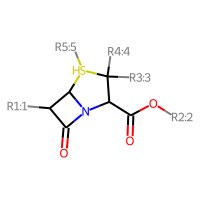
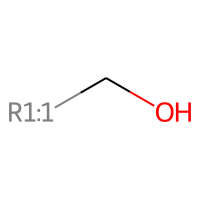
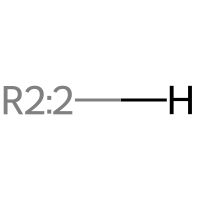
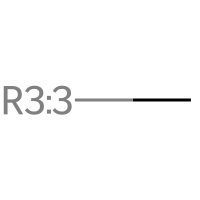
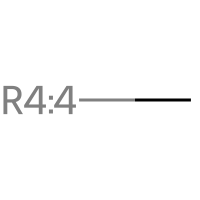
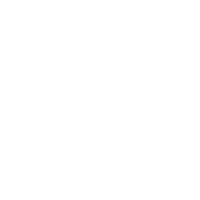
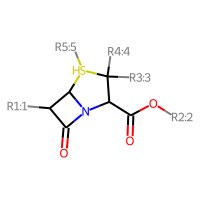
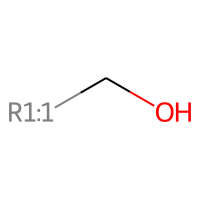
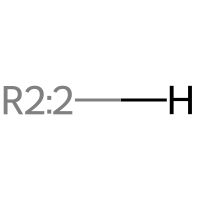
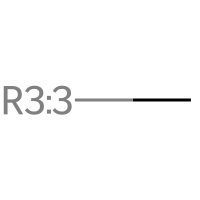
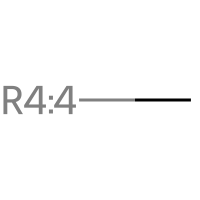
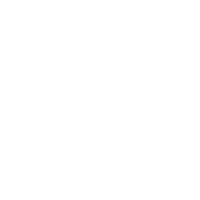
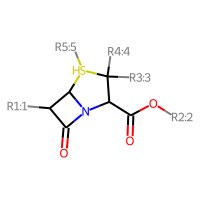
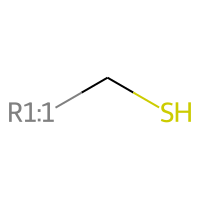
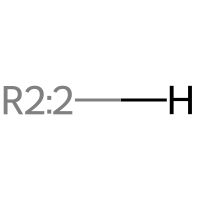
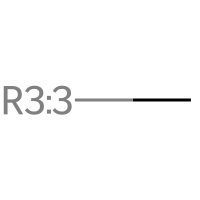
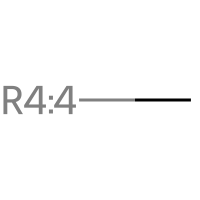
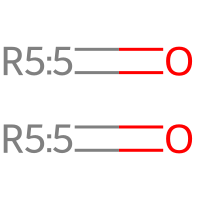
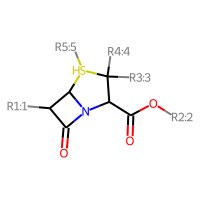
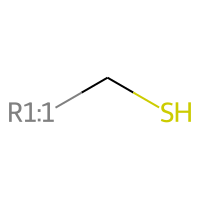
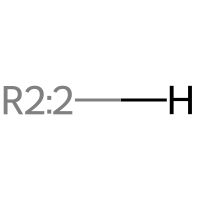
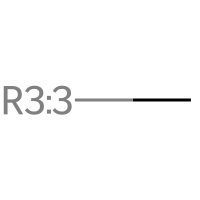
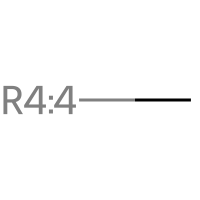
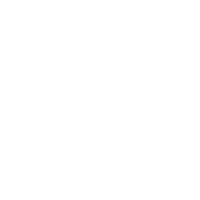
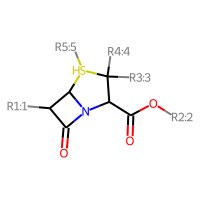
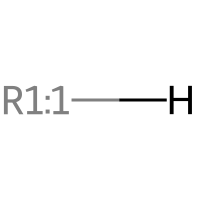
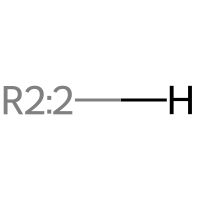
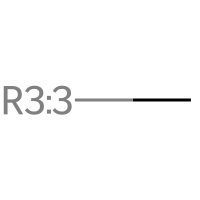
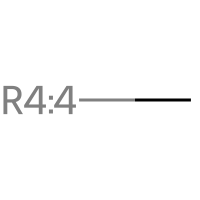
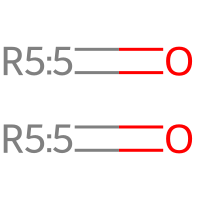
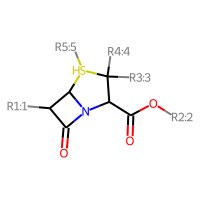
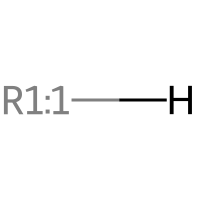
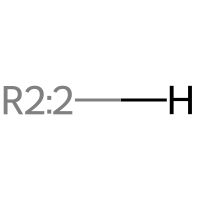
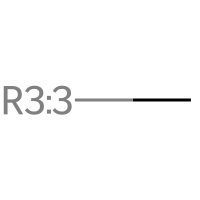
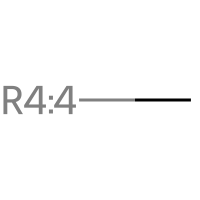
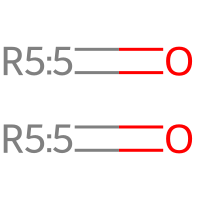
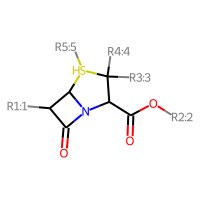
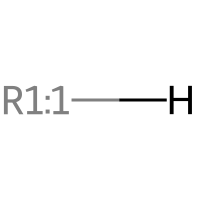
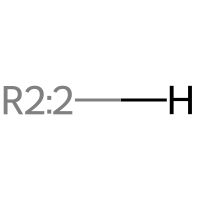
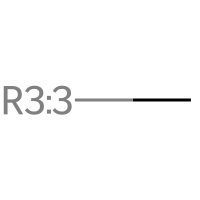
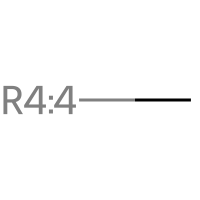
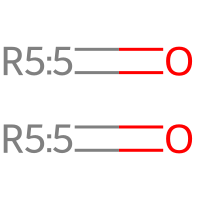
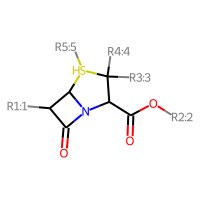
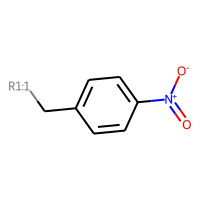
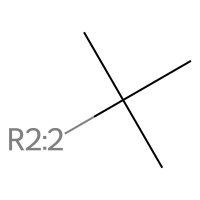
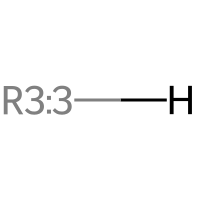
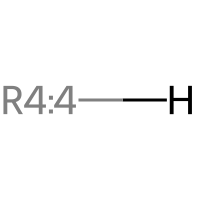
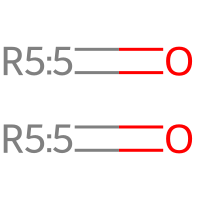
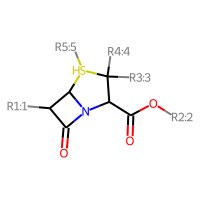
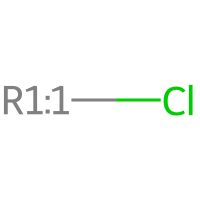
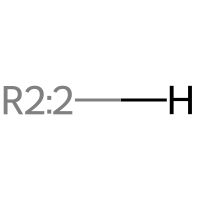
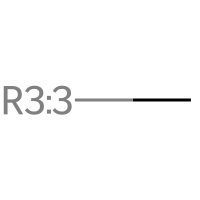
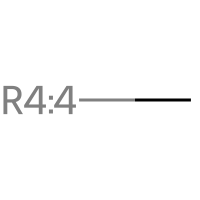
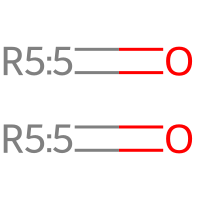
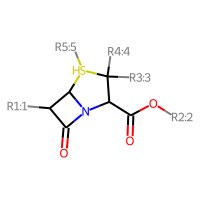
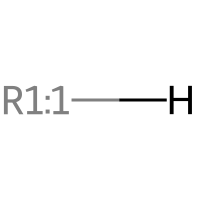
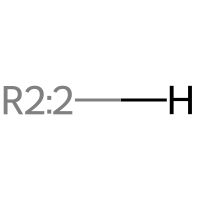
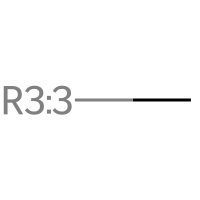
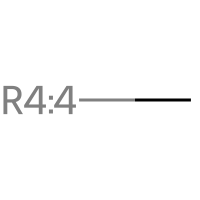
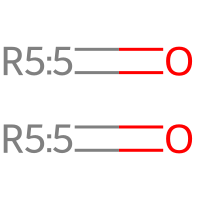
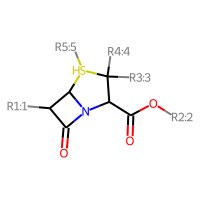
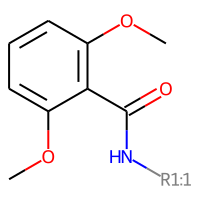
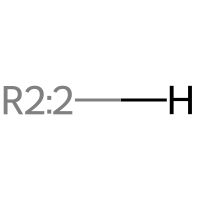
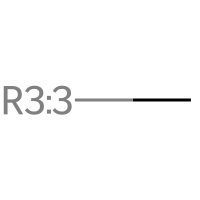
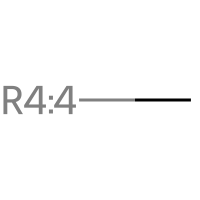
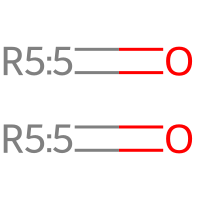
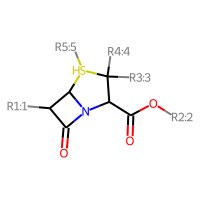
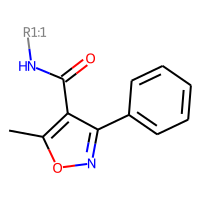
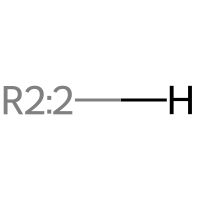
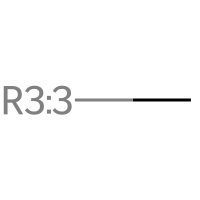
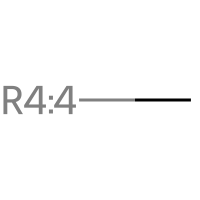
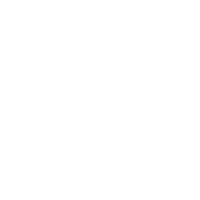
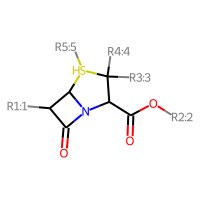
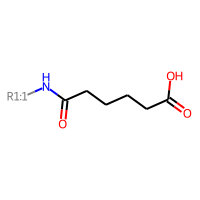
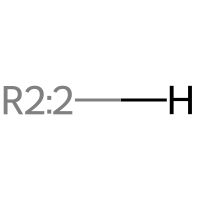
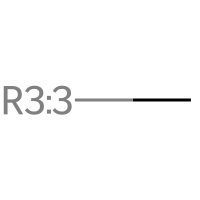
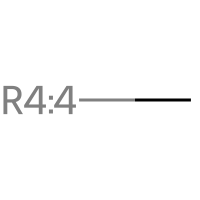
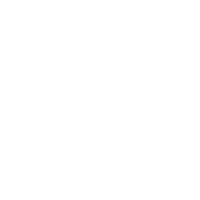
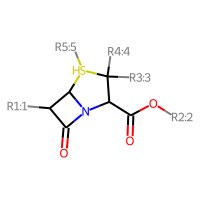
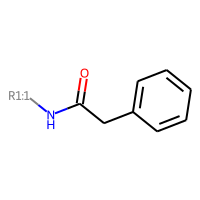
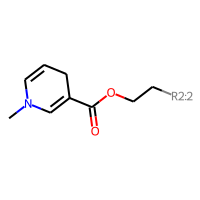
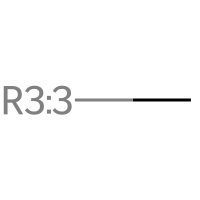
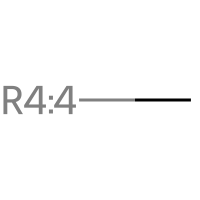
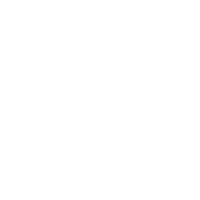
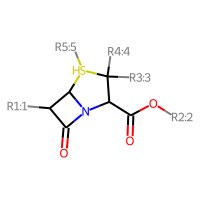
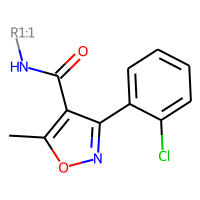
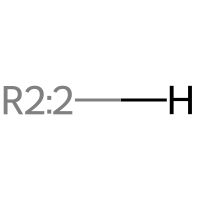
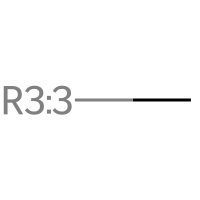
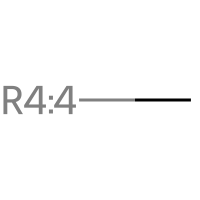
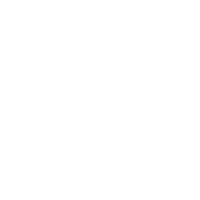
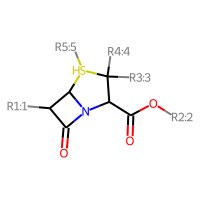
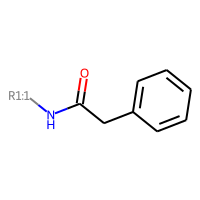
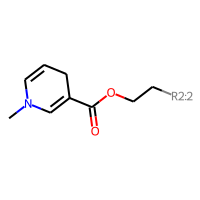
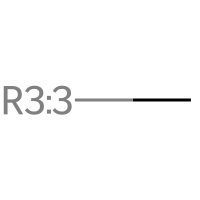
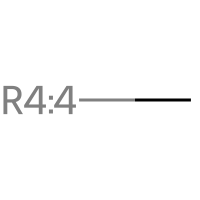
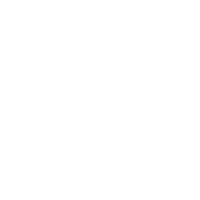
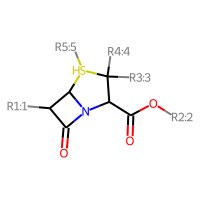
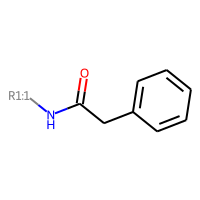
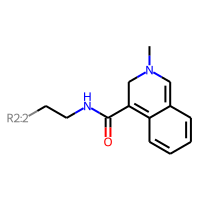
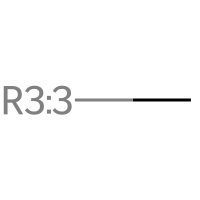
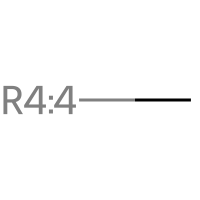
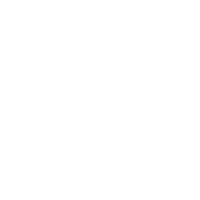
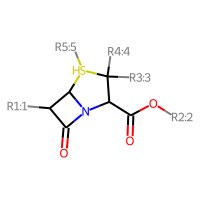
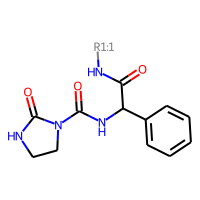
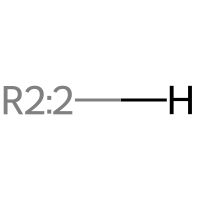
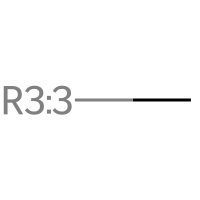
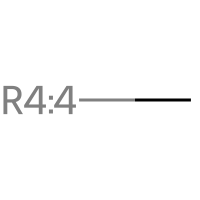
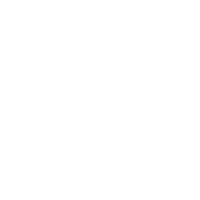
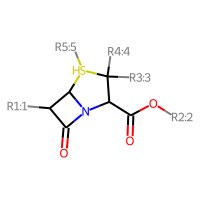
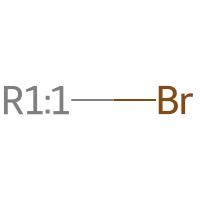
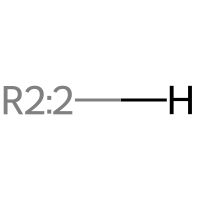
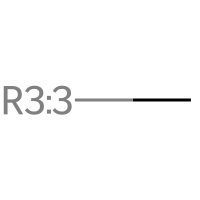
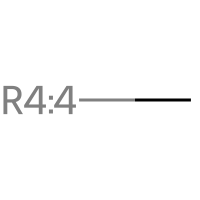
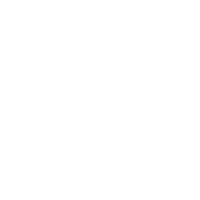
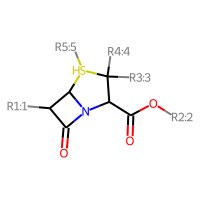
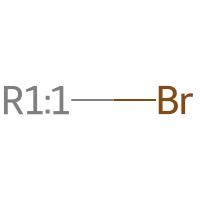
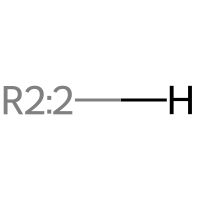
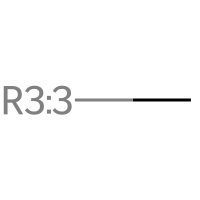
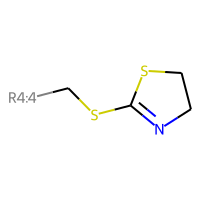
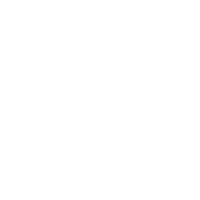
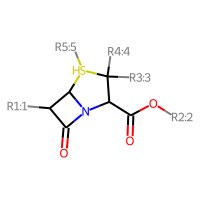
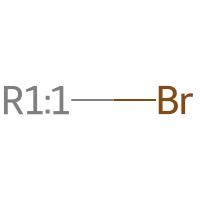
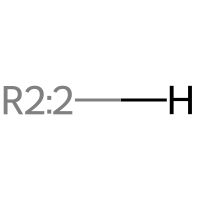
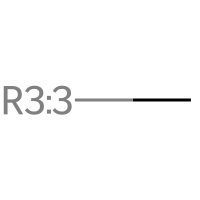
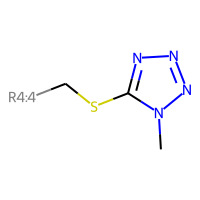
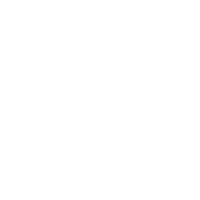
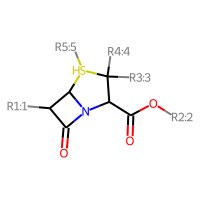
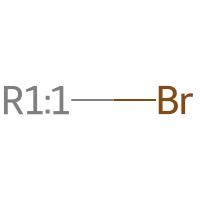
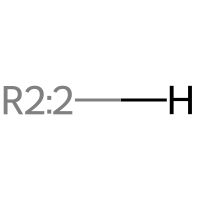
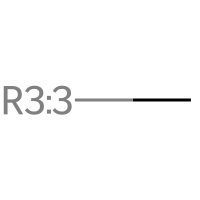
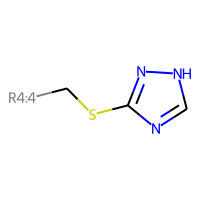
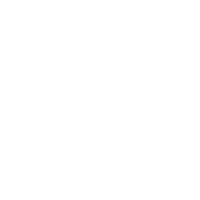
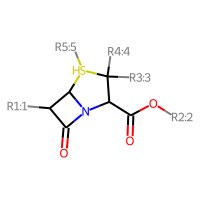
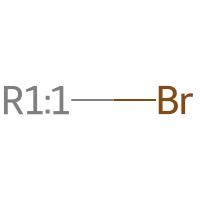
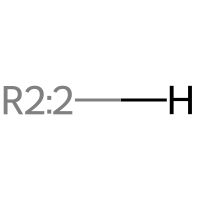
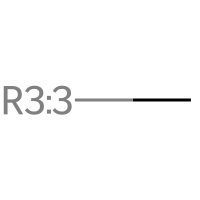
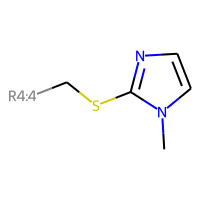
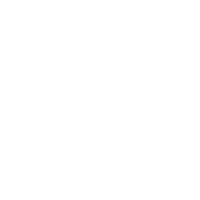
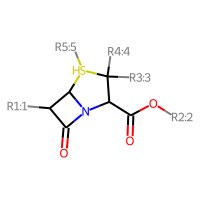
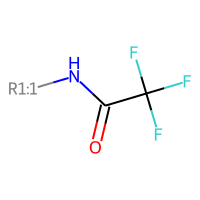
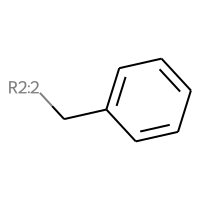
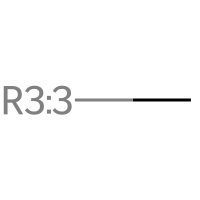
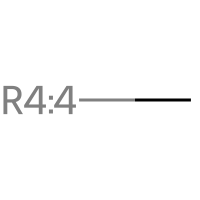
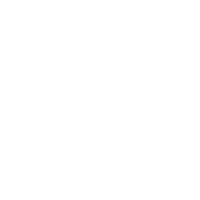
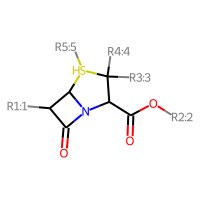
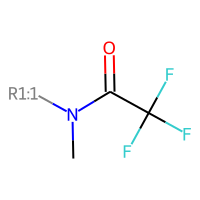
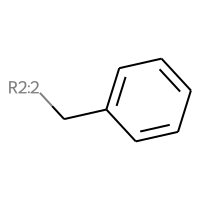
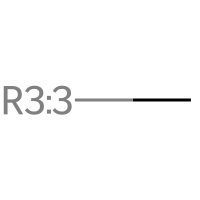
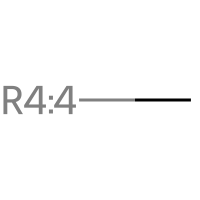
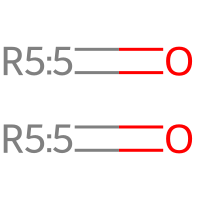
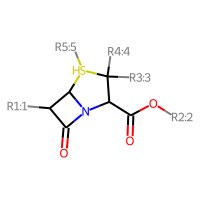
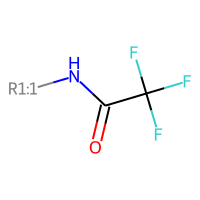
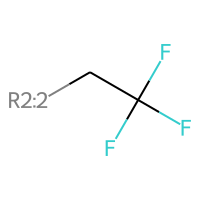
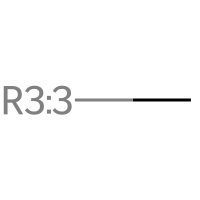
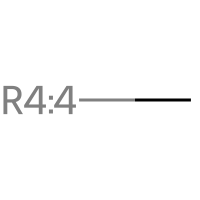
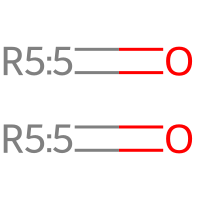
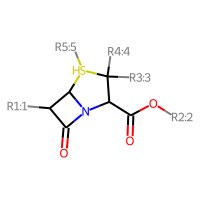
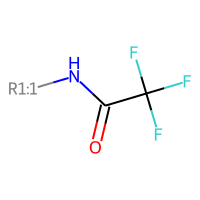
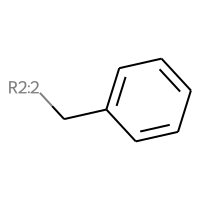
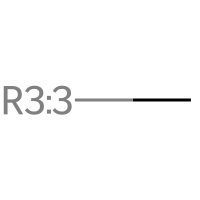
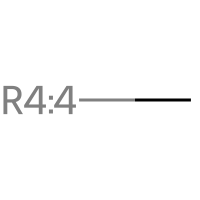
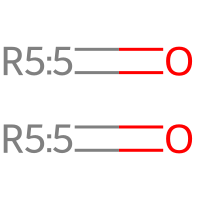
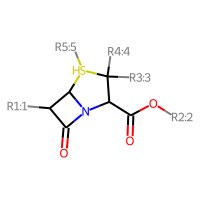
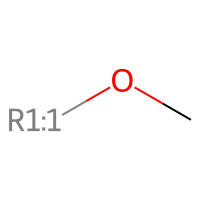
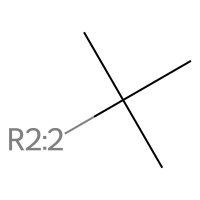
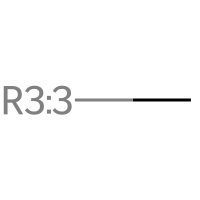
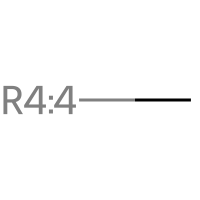
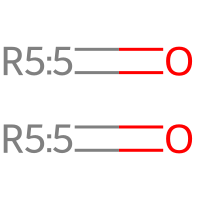
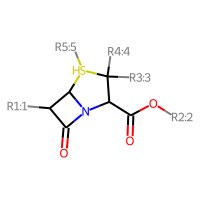
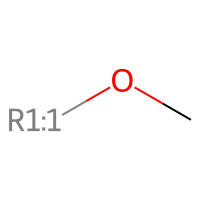
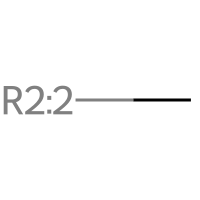
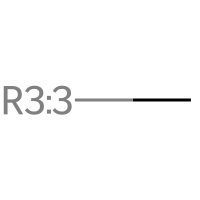
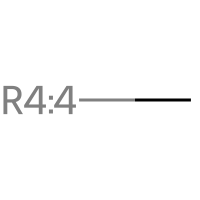
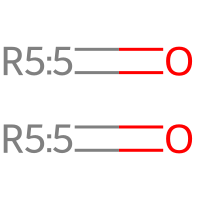
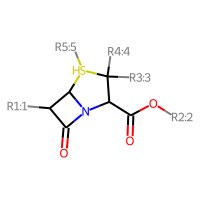
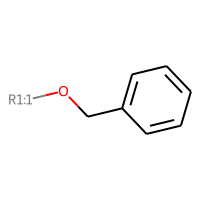
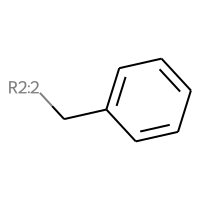
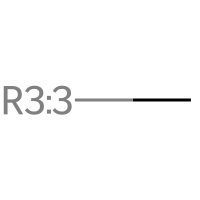
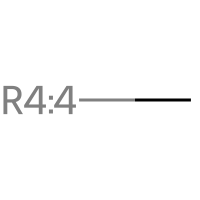
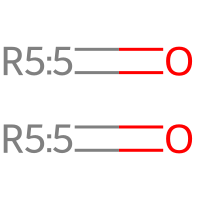
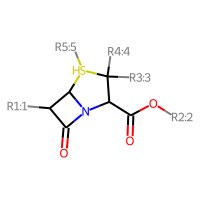
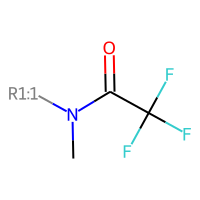
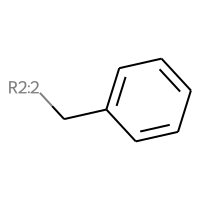
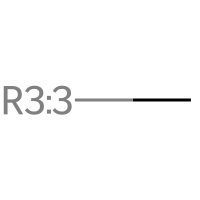
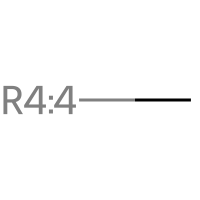
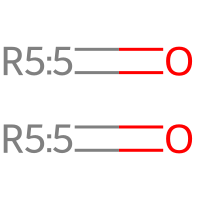
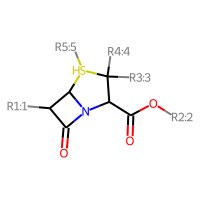
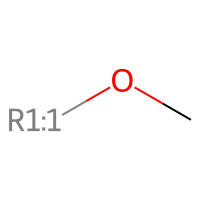
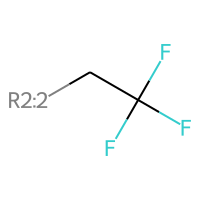
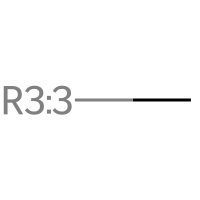
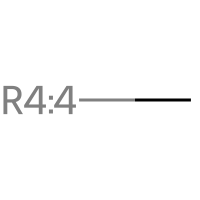
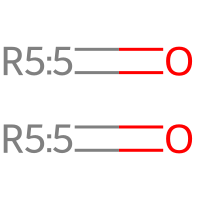
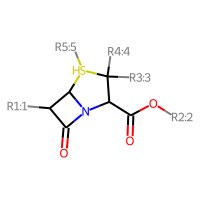
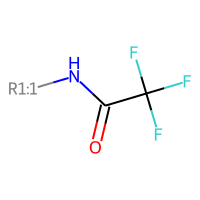
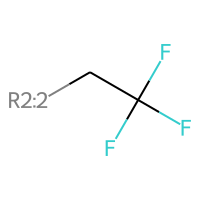
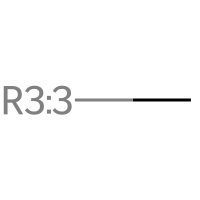
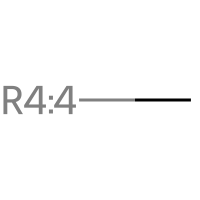
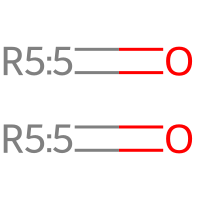
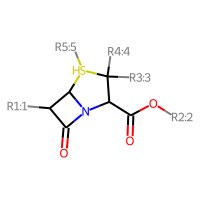
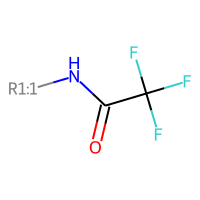
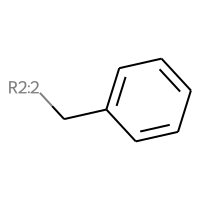
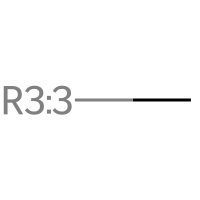
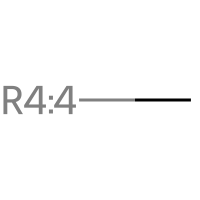
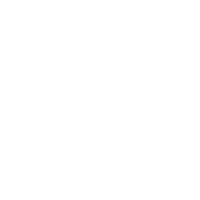
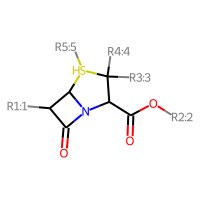
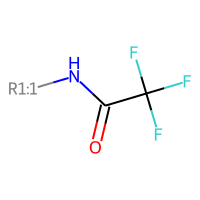
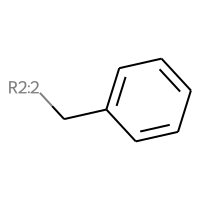
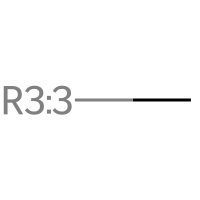
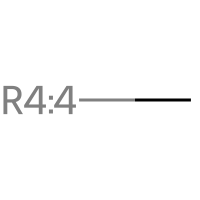
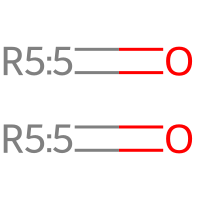
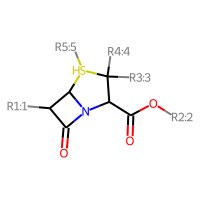
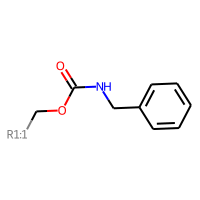
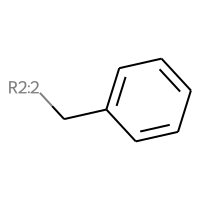
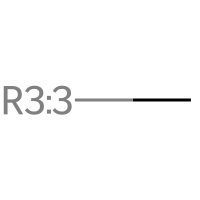
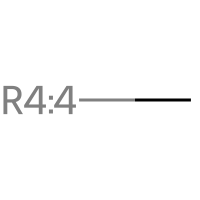
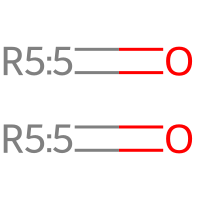
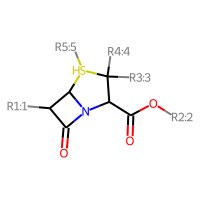
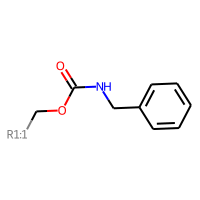
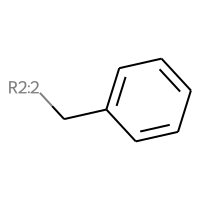
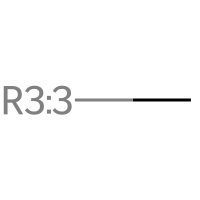
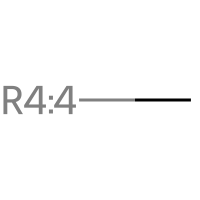
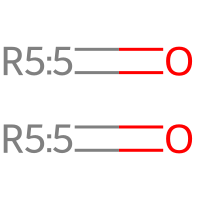
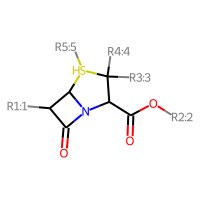
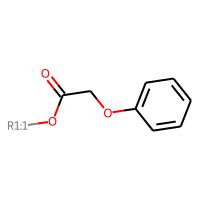
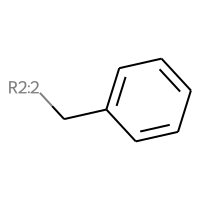
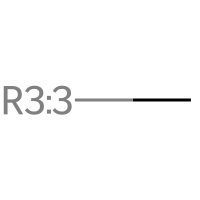
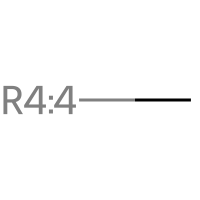
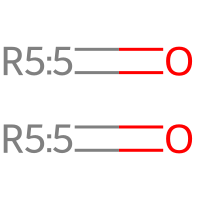
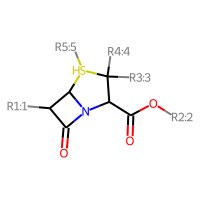
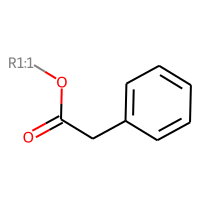
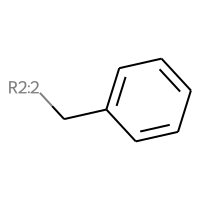
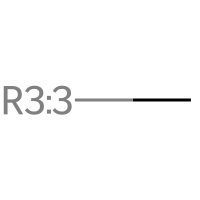
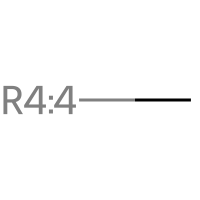
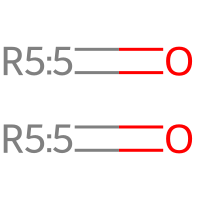
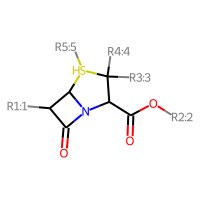
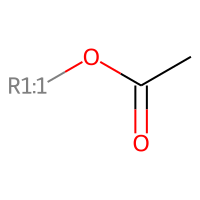
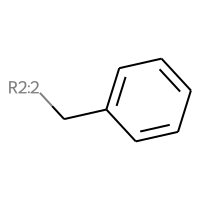
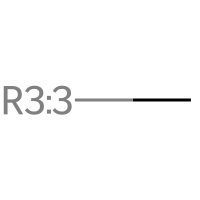
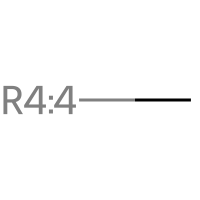
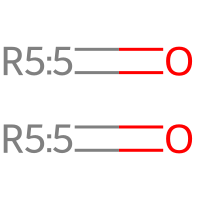
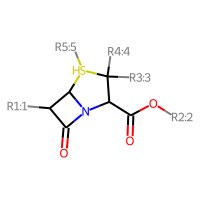
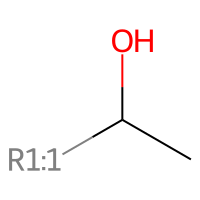
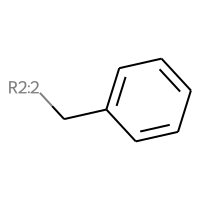
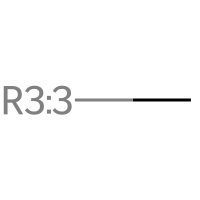
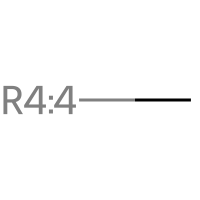
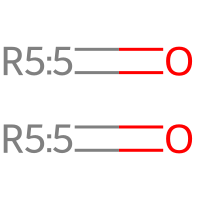
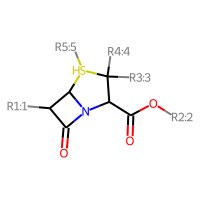
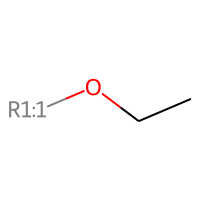
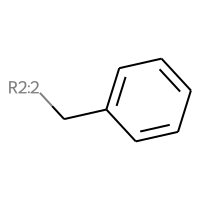
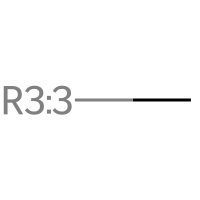
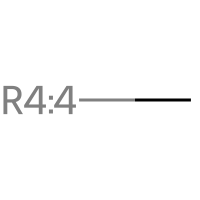
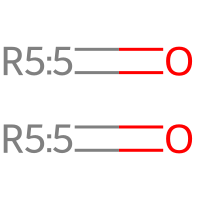
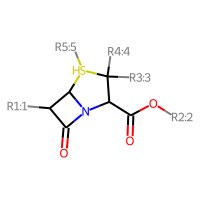
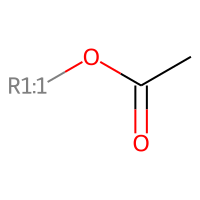
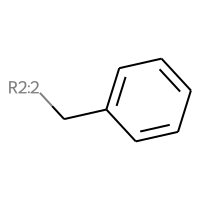
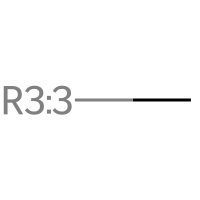
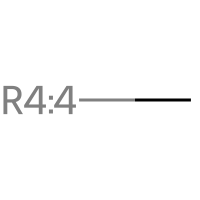
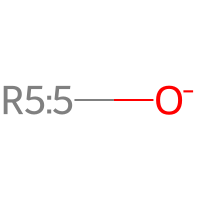
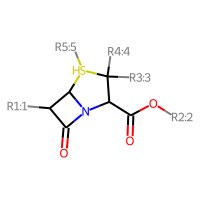
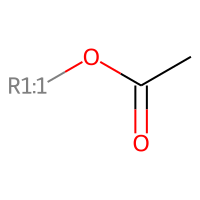
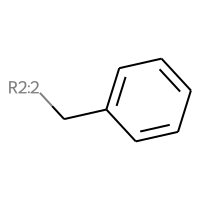
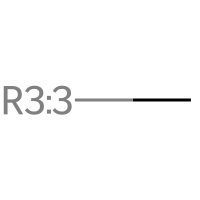
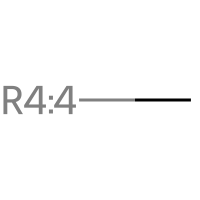
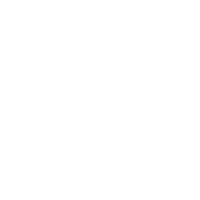
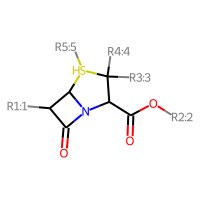
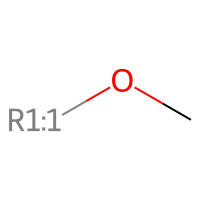
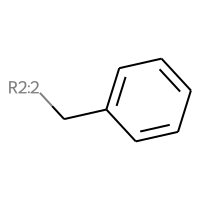
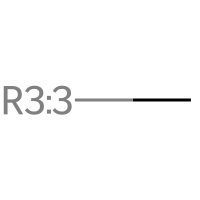
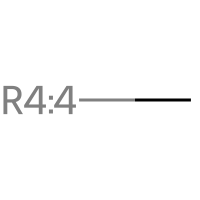
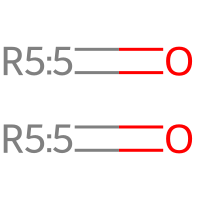
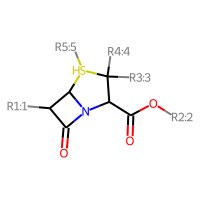
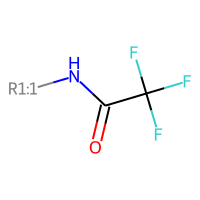
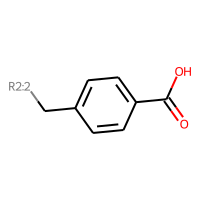
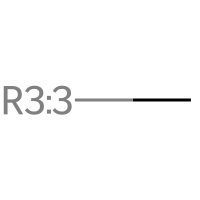
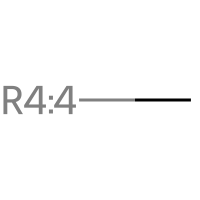
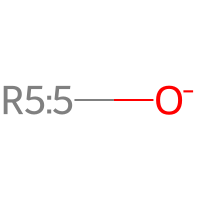
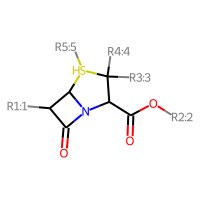
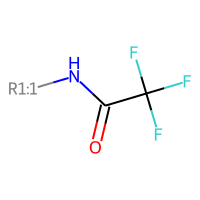
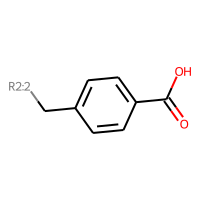
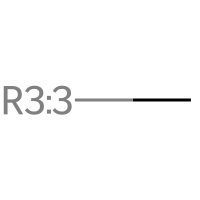
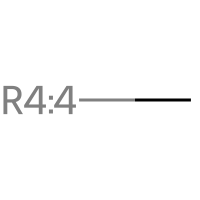
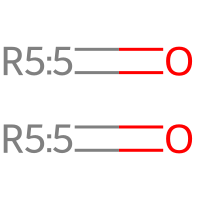
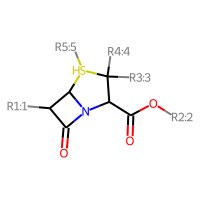
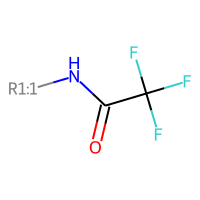
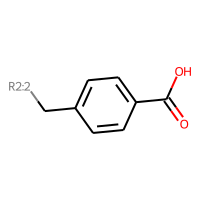
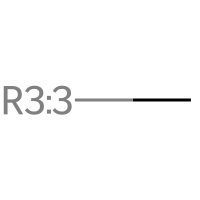
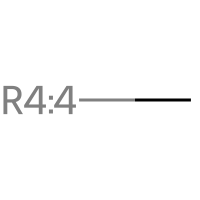
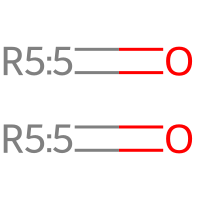
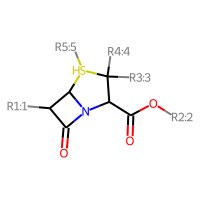
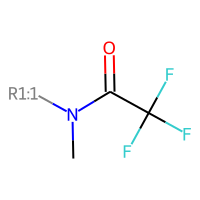
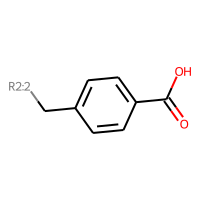
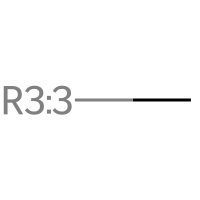
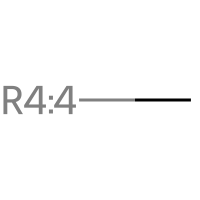
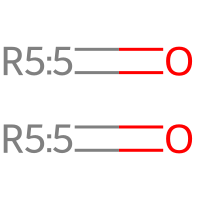
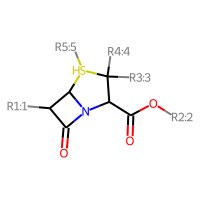
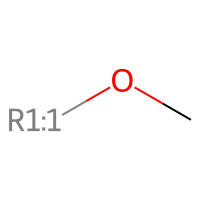
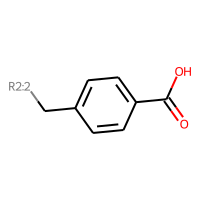
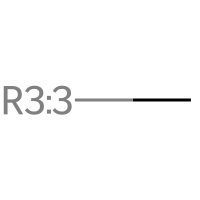
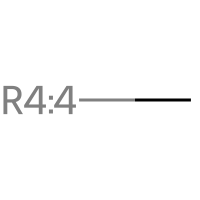
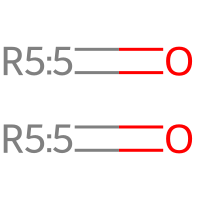
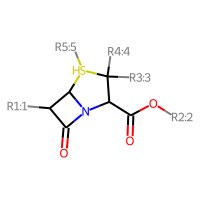
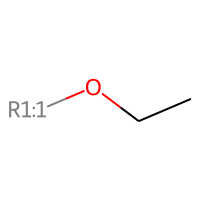
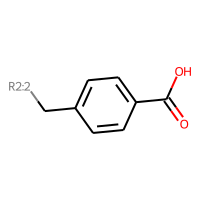
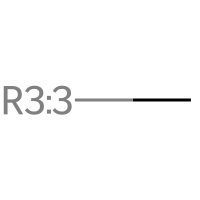
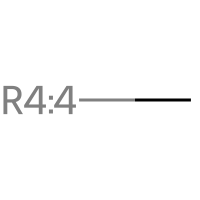
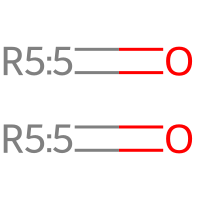
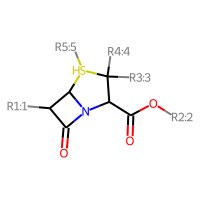
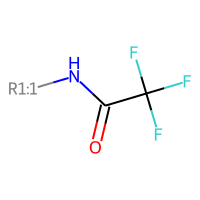
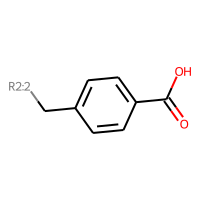
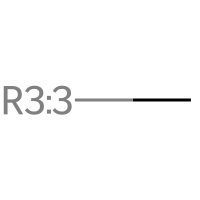
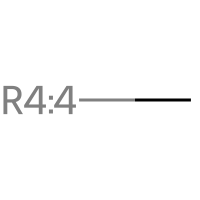
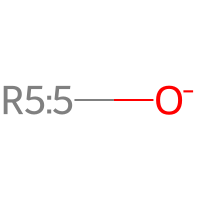
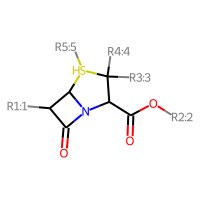
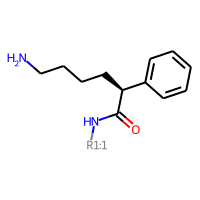
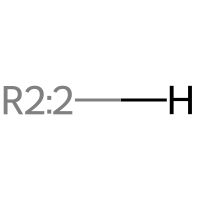
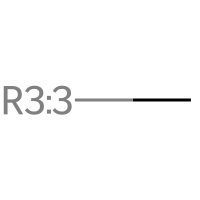
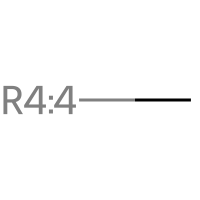
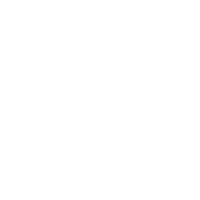
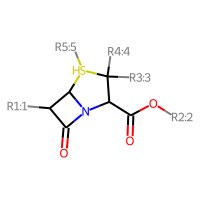
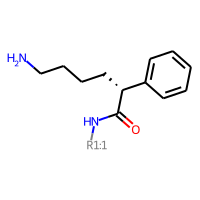
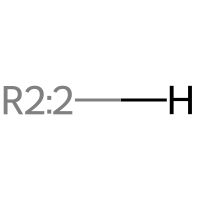
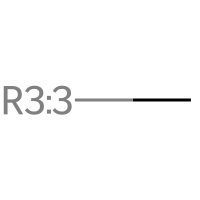
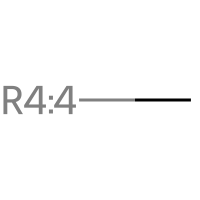
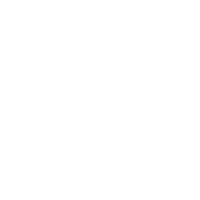
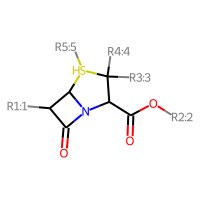
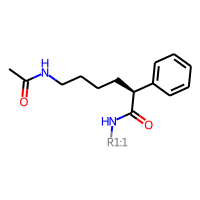
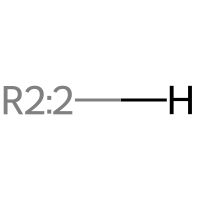
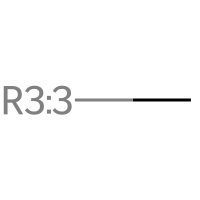
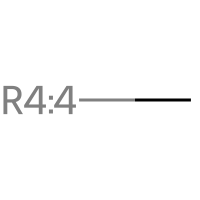
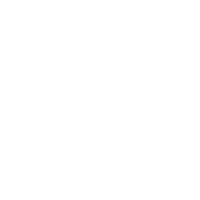
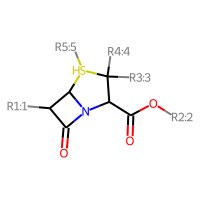
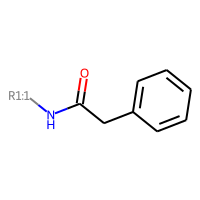
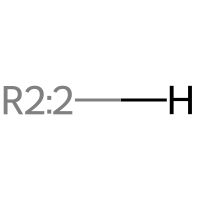
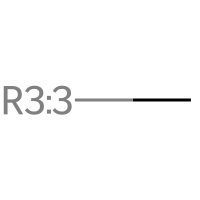
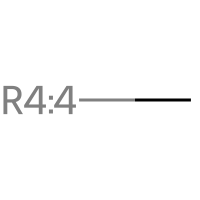
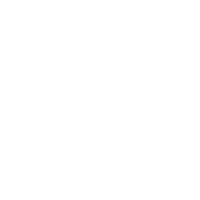
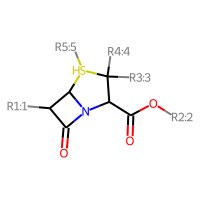
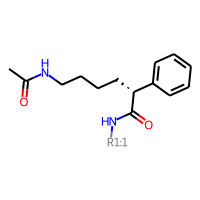
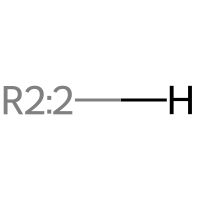
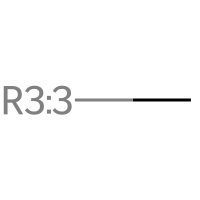
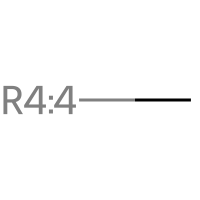
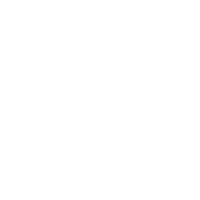
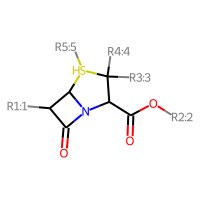
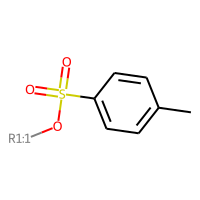
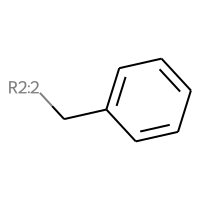
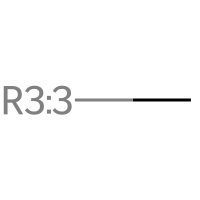
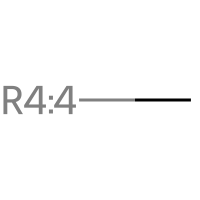
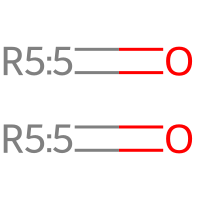
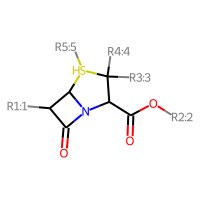
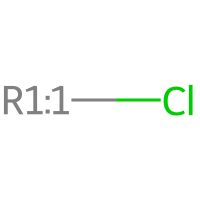
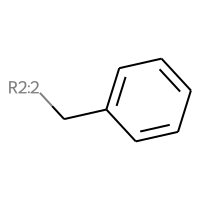
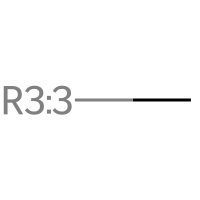
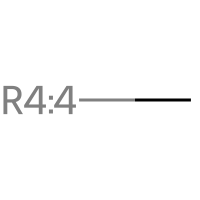
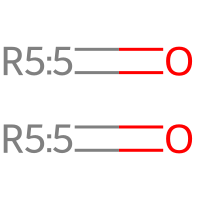
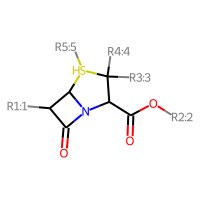
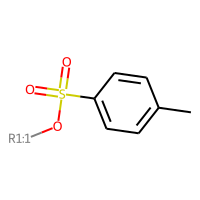
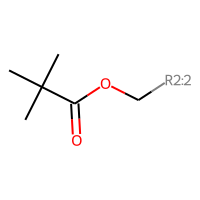
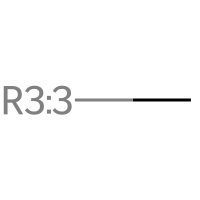
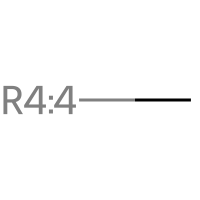
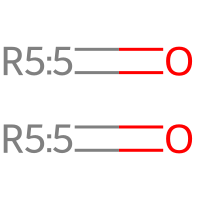
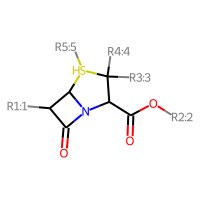
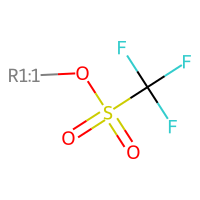
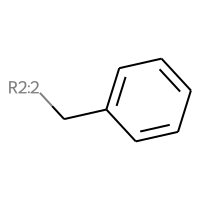
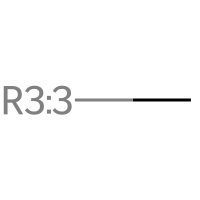
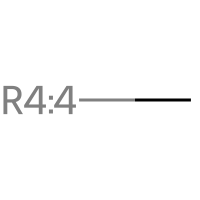
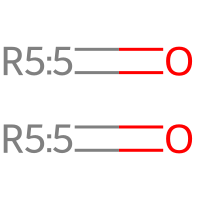
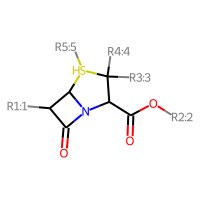
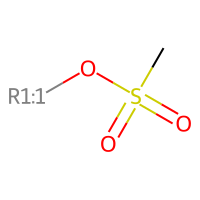
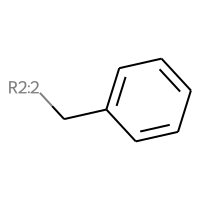
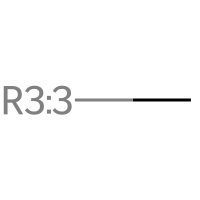
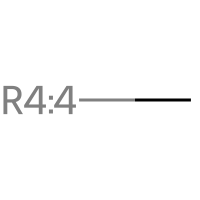
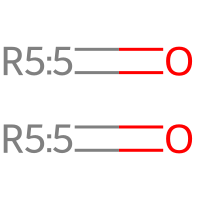
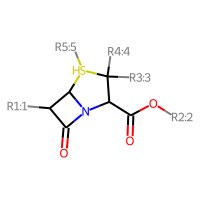
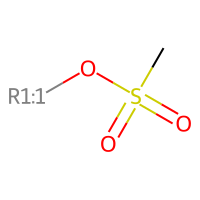
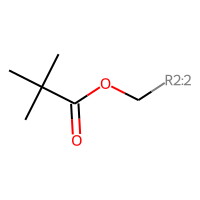
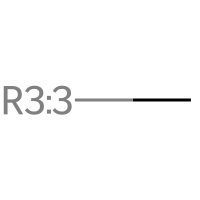
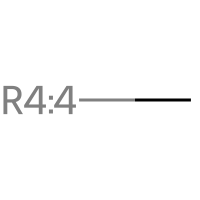
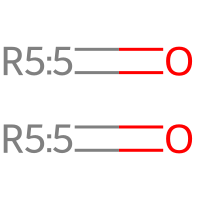
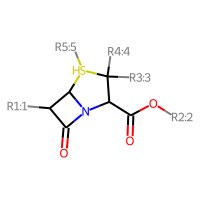
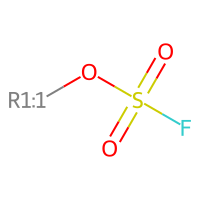
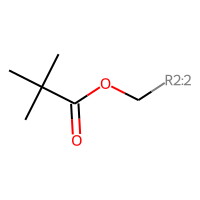
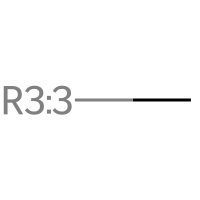
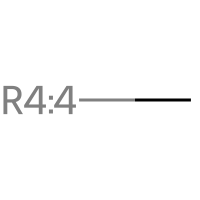
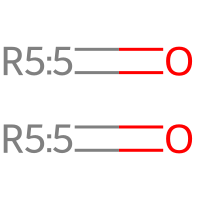
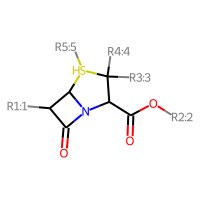
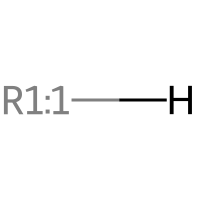
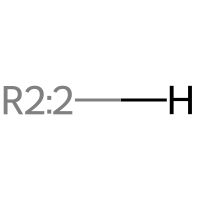
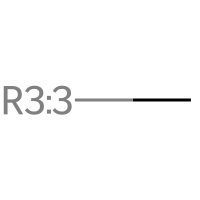
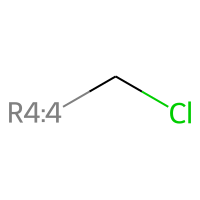
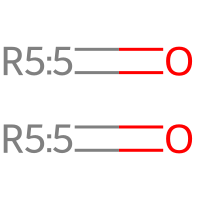
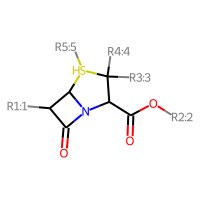
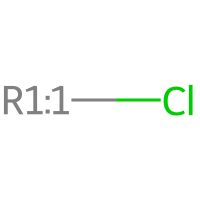
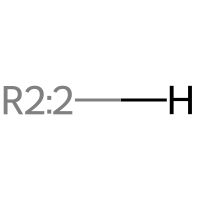
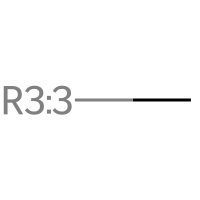
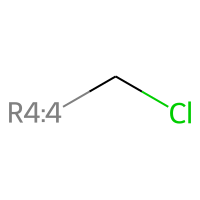
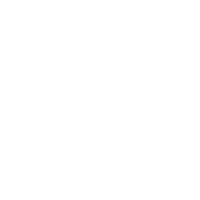
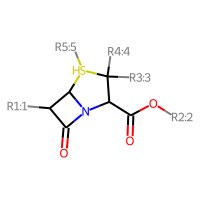
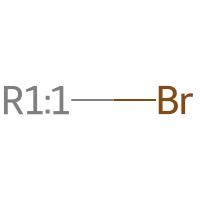
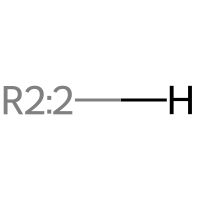
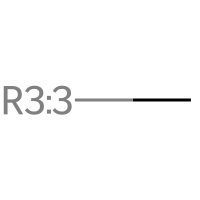
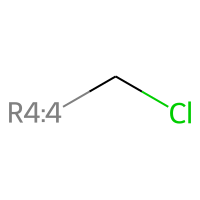
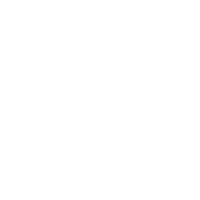
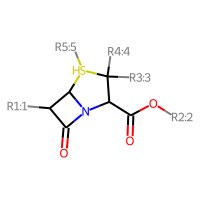
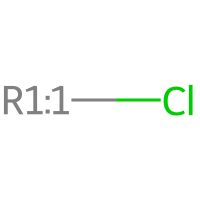
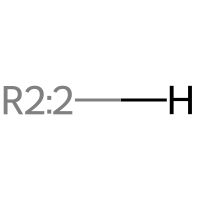
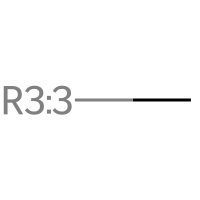
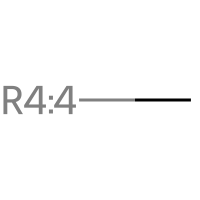
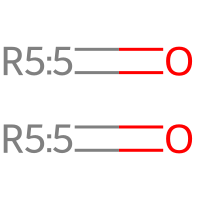
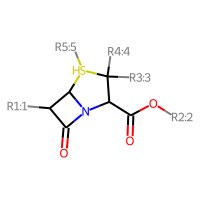
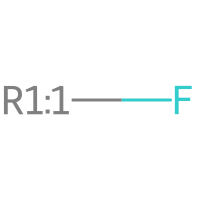
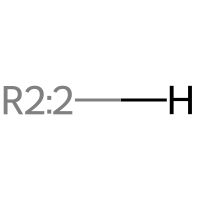
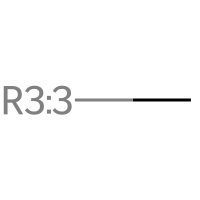
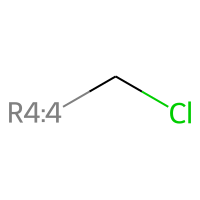
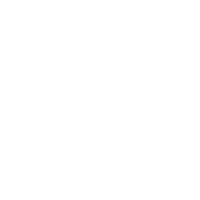
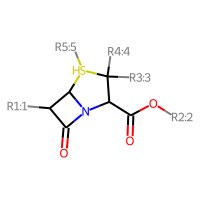
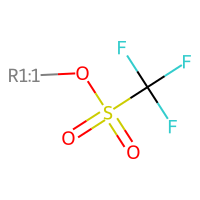
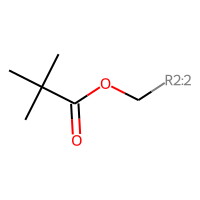
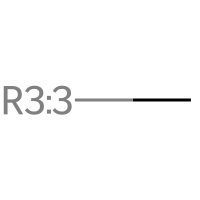
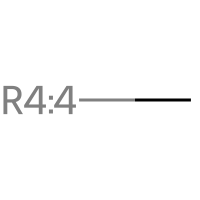
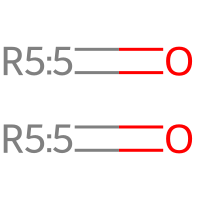
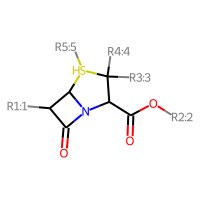
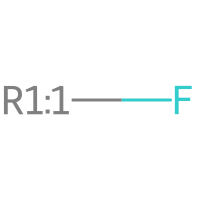
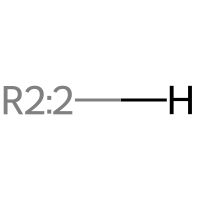
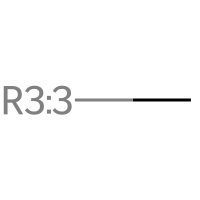
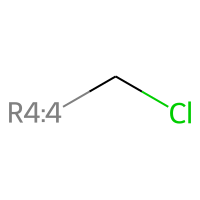
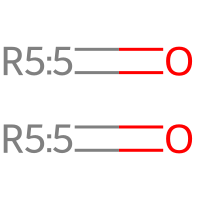
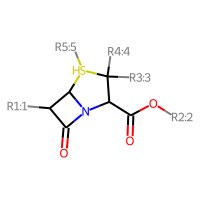
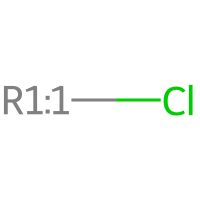
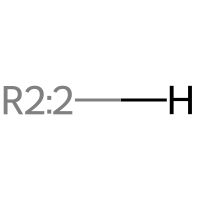
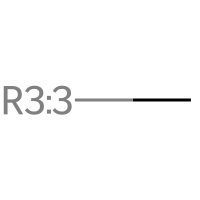
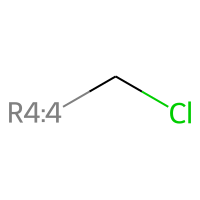
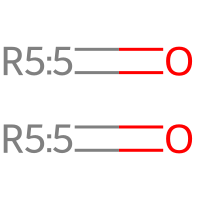
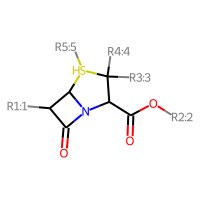
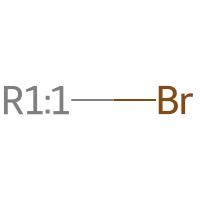
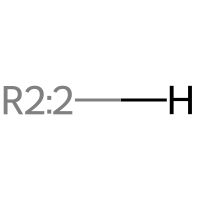
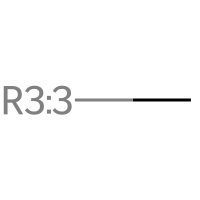
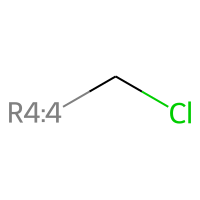
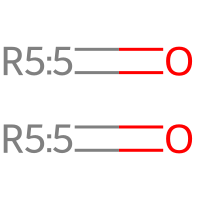
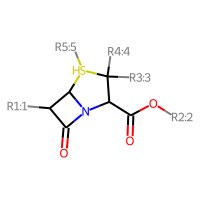
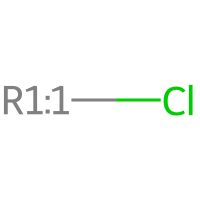
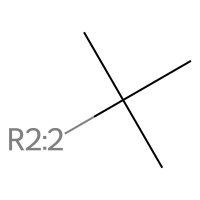
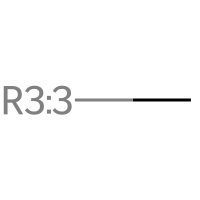
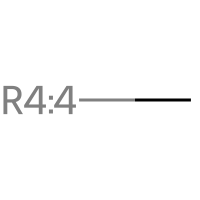
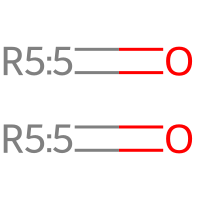
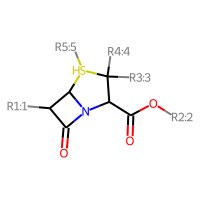
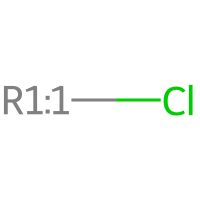
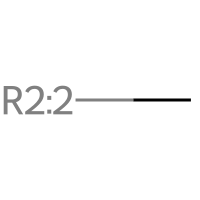
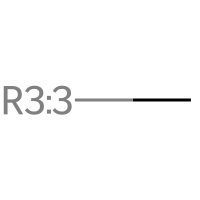
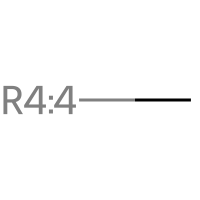
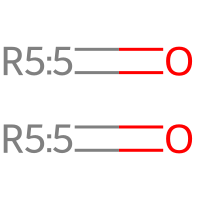
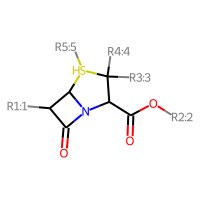
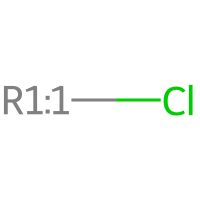
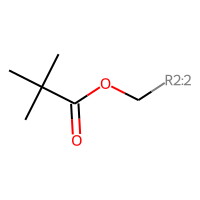
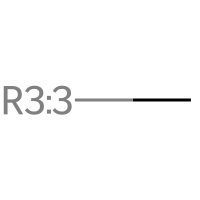
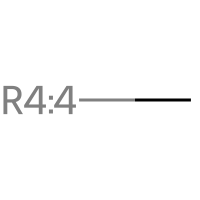
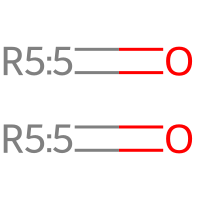
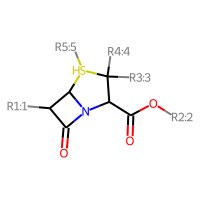
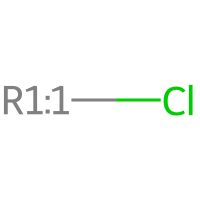
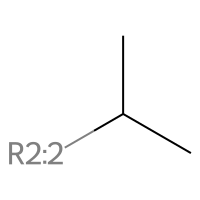
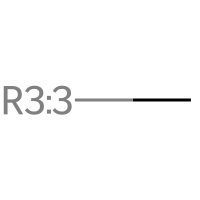
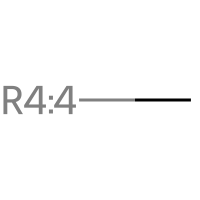
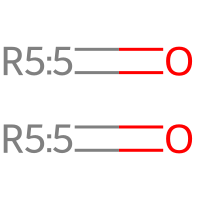
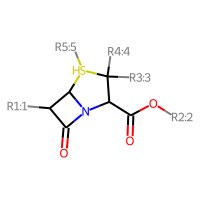
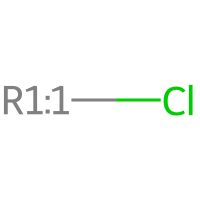
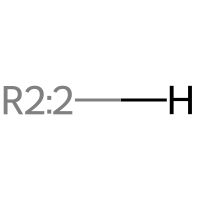
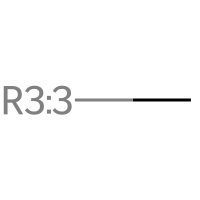
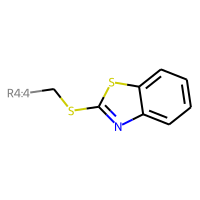
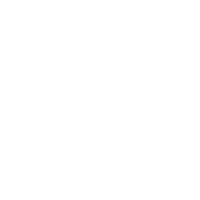
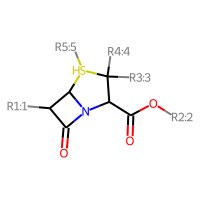
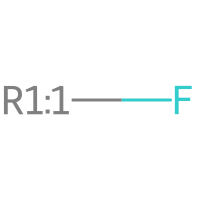
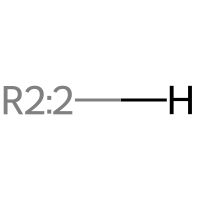
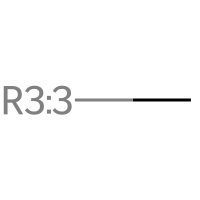
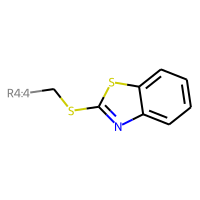
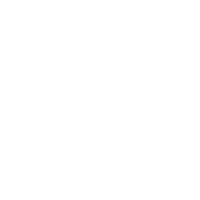
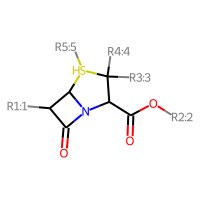
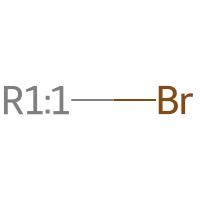
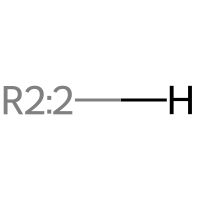
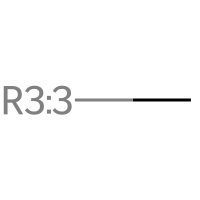
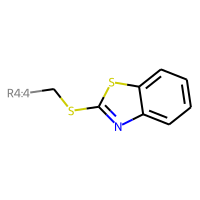
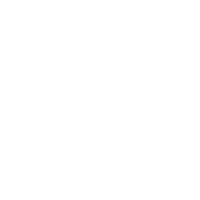

In [55]:
HTML(easy_frame.to_html())

In [56]:
stereo_frame = pd.DataFrame(rg_stereo.GetRGroupsAsColumns())
PandasTools.ChangeMoleculeRendering(stereo_frame)

In [57]:
stereo_frame

Core  \
0    <img data-content="rdkit/molecule" src="data:i...   
1    <img data-content="rdkit/molecule" src="data:i...   
2    <img data-content="rdkit/molecule" src="data:i...   
3    <img data-content="rdkit/molecule" src="data:i...   
4    <img data-content="rdkit/molecule" src="data:i...   
..                                                 ...   
105  <img data-content="rdkit/molecule" src="data:i...   
106  <img data-content="rdkit/molecule" src="data:i...   
107  <img data-content="rdkit/molecule" src="data:i...   
108  <img data-content="rdkit/molecule" src="data:i...   
109  <img data-content="rdkit/molecule" src="data:i...   

                                                    R1  \
0    <img data-content="rdkit/molecule" src="data:i...   
1    <img data-content="rdkit/molecule" src="data:i...   
2    <img data-content="rdkit/molecule" src="data:i...   
3    <img data-content="rdkit/molecule" src="data:i...   
4    <img data-content="rdkit/molecule" src="data:i...   
..                                                 ...   
105  <img data-content="rdkit/molecule" src="data:i...   
106  <img data-content="rdkit/molecule" src="data:i...   
107  <img data-content="rdkit/molecule" src="data:i...   
108  <img data-content="rdkit/molecule" src="data:i...   
109  <img data-content="rdkit/molecule" src="data:i...   

                                                    R2  \
0    <img data-content="rdkit/molecule" src="data:i...   
1    <img data-content="rdkit/molecule" src="data:i...   
2    <img data-content="rdkit/molecule" src="data:i...   
3    <img data-content="rdkit/molecule" src="data:i...   
4    <img data-content="rdkit/molecule" src="data:i...   
..                                                 ...   
105  <img data-content="rdkit/molecule" src="data:i...   
106  <img data-content="rdkit/molecule" src="data:i...   
107  <img data-content="rdkit/molecule" src="data:i...   
108  <img data-content="rdkit/molecule" src="data:i...   
109  <img data-content="rdkit/molecule" src="data:i...   

                                                    R3  \
0    <img data-content="rdkit/molecule" src="data:i...   
1    <img data-content="rdkit/molecule" src="data:i...   
2    <img data-content="rdkit/molecule" src="data:i...   
3    <img data-content="rdkit/molecule" src="data:i...   
4    <img data-content="rdkit/molecule" src="data:i...   
..                                                 ...   
105  <img data-content="rdkit/molecule" src="data:i...   
106  <img data-content="rdkit/molecule" src="data:i...   
107  <img data-content="rdkit/molecule" src="data:i...   
108  <img data-content="rdkit/molecule" src="data:i...   
109  <img data-content="rdkit/molecule" src="data:i...   

                                                    R4  \
0    <img data-content="rdkit/molecule" src="data:i...   
1    <img data-content="rdkit/molecule" src="data:i...   
2    <img data-content="rdkit/molecule" src="data:i...   
3    <img data-content="rdkit/molecule" src="data:i...   
4    <img data-content="rdkit/molecule" src="data:i...   
..                                                 ...   
105  <img data-content="rdkit/molecule" src="data:i...   
106  <img data-content="rdkit/molecule" src="data:i...   
107  <img data-content="rdkit/molecule" src="data:i...   
108  <img data-content="rdkit/molecule" src="data:i...   
109  <img data-content="rdkit/molecule" src="data:i...   

                                                    R5  \
0    <img data-content="rdkit/molecule" src="data:i...   
1    <img data-content="rdkit/molecule" src="data:i...   
2    <img data-content="rdkit/molecule" src="data:i...   
3    <img data-content="rdkit/molecule" src="data:i...   
4    <img data-content="rdkit/molecule" src="data:i...   
..                                                 ...   
105  <img data-content="rdkit/molecule" src="data:i...   
106  <img data-content="rdkit/molecule" src="data:i...   
107  <img data-content="rdkit/molecule" src